# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.90'

## Specifying filetype, and folder as before

In [2]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [3]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [4]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

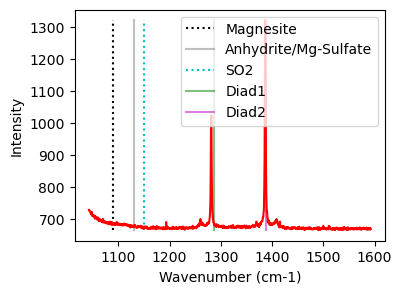

In [5]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [6]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [7]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=351.2975680664613, HB_prom=28.6700083533716, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1281.253549       1281.253599        0.006891       1060.811066   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.981475                  0  1260.817634  176.327585    2.94545   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             360.187716        2.706836        0.903696     1.96295   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.083929      1.116603                   0.164748   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0               0.00545  PseudoVoigtModel

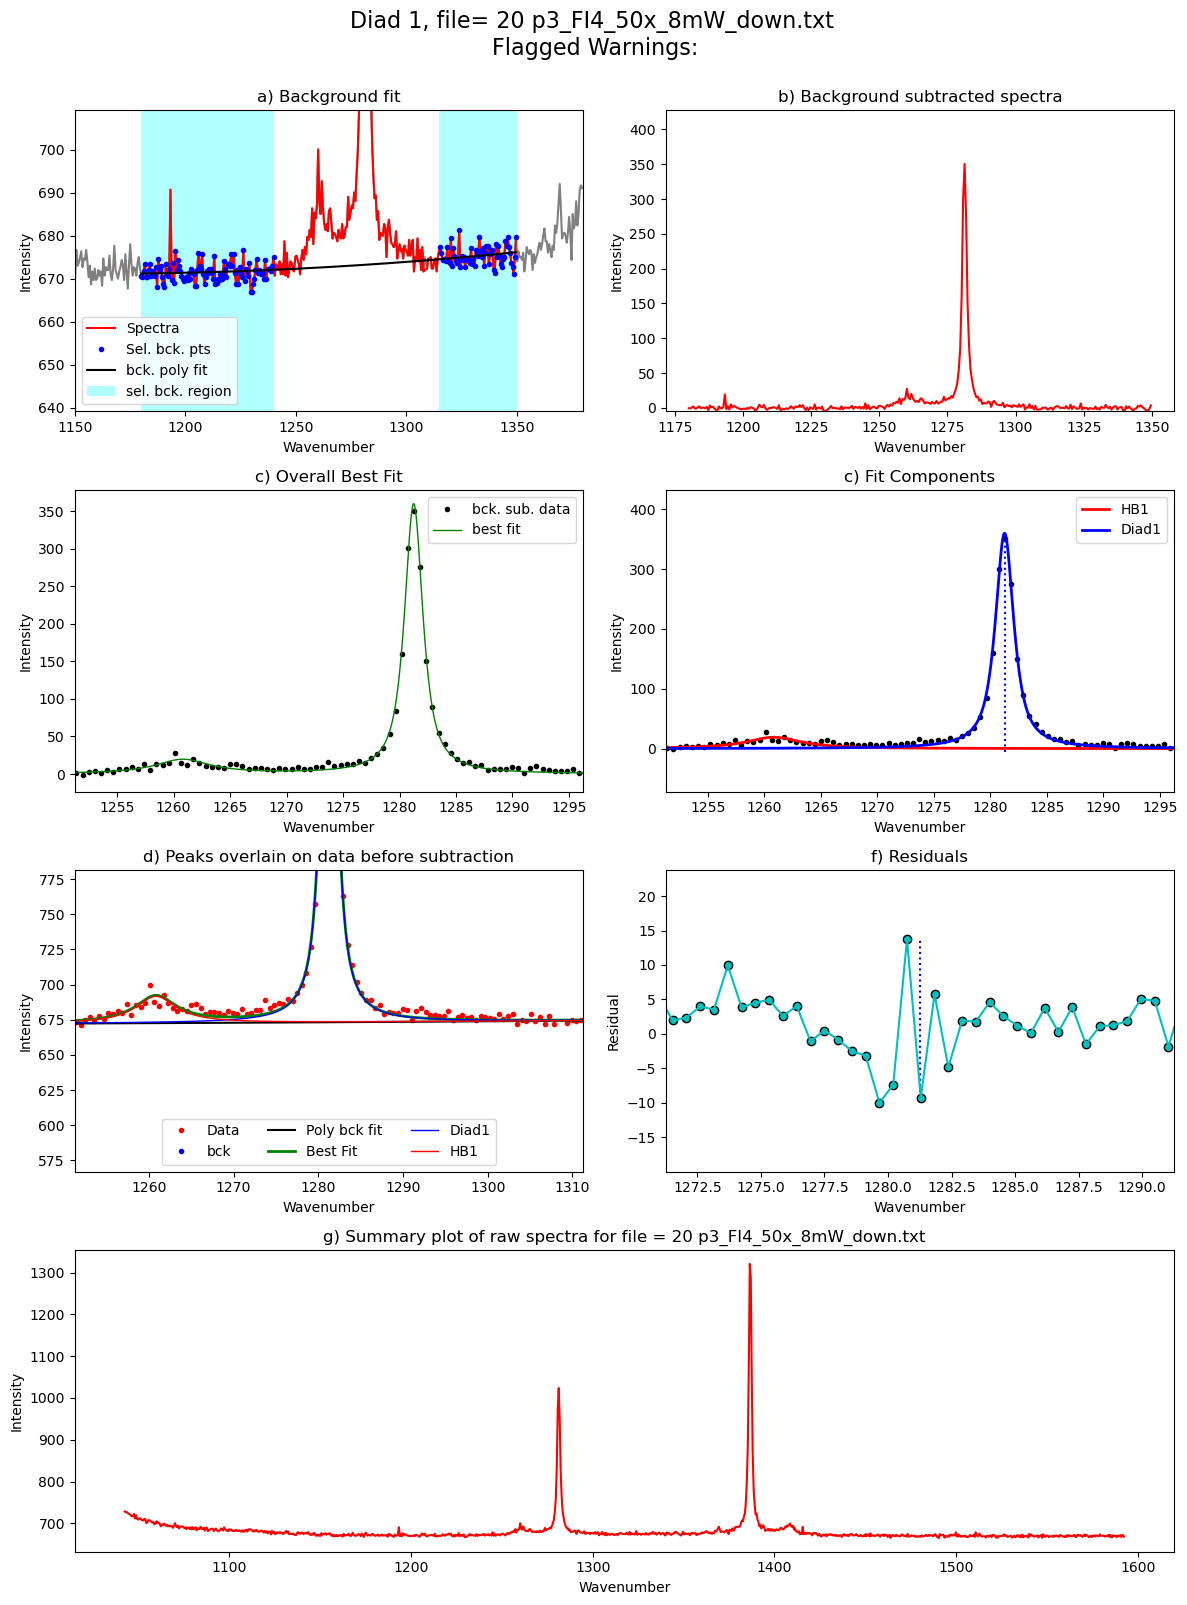

In [8]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [9]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [10]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=57.88323051244879, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=671.7711666446771, HB_prom=28.941615256224395, C13_prom=11.835256017592087, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1386.664646       1386.664596        0.002968       1778.684192   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.912793                  0  1408.218553  176.336732   2.740764   

      C13_Cent  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0  1369.264925  ...    1.825586       1388.104224        217.775994   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50  Diad2_Asym70  \
0          12.104535  Flagged Warnings:      1.096774      1.021465   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                    0.17667              0.002687  PseudoVoigtModel  

[1 rows x 25 columns]

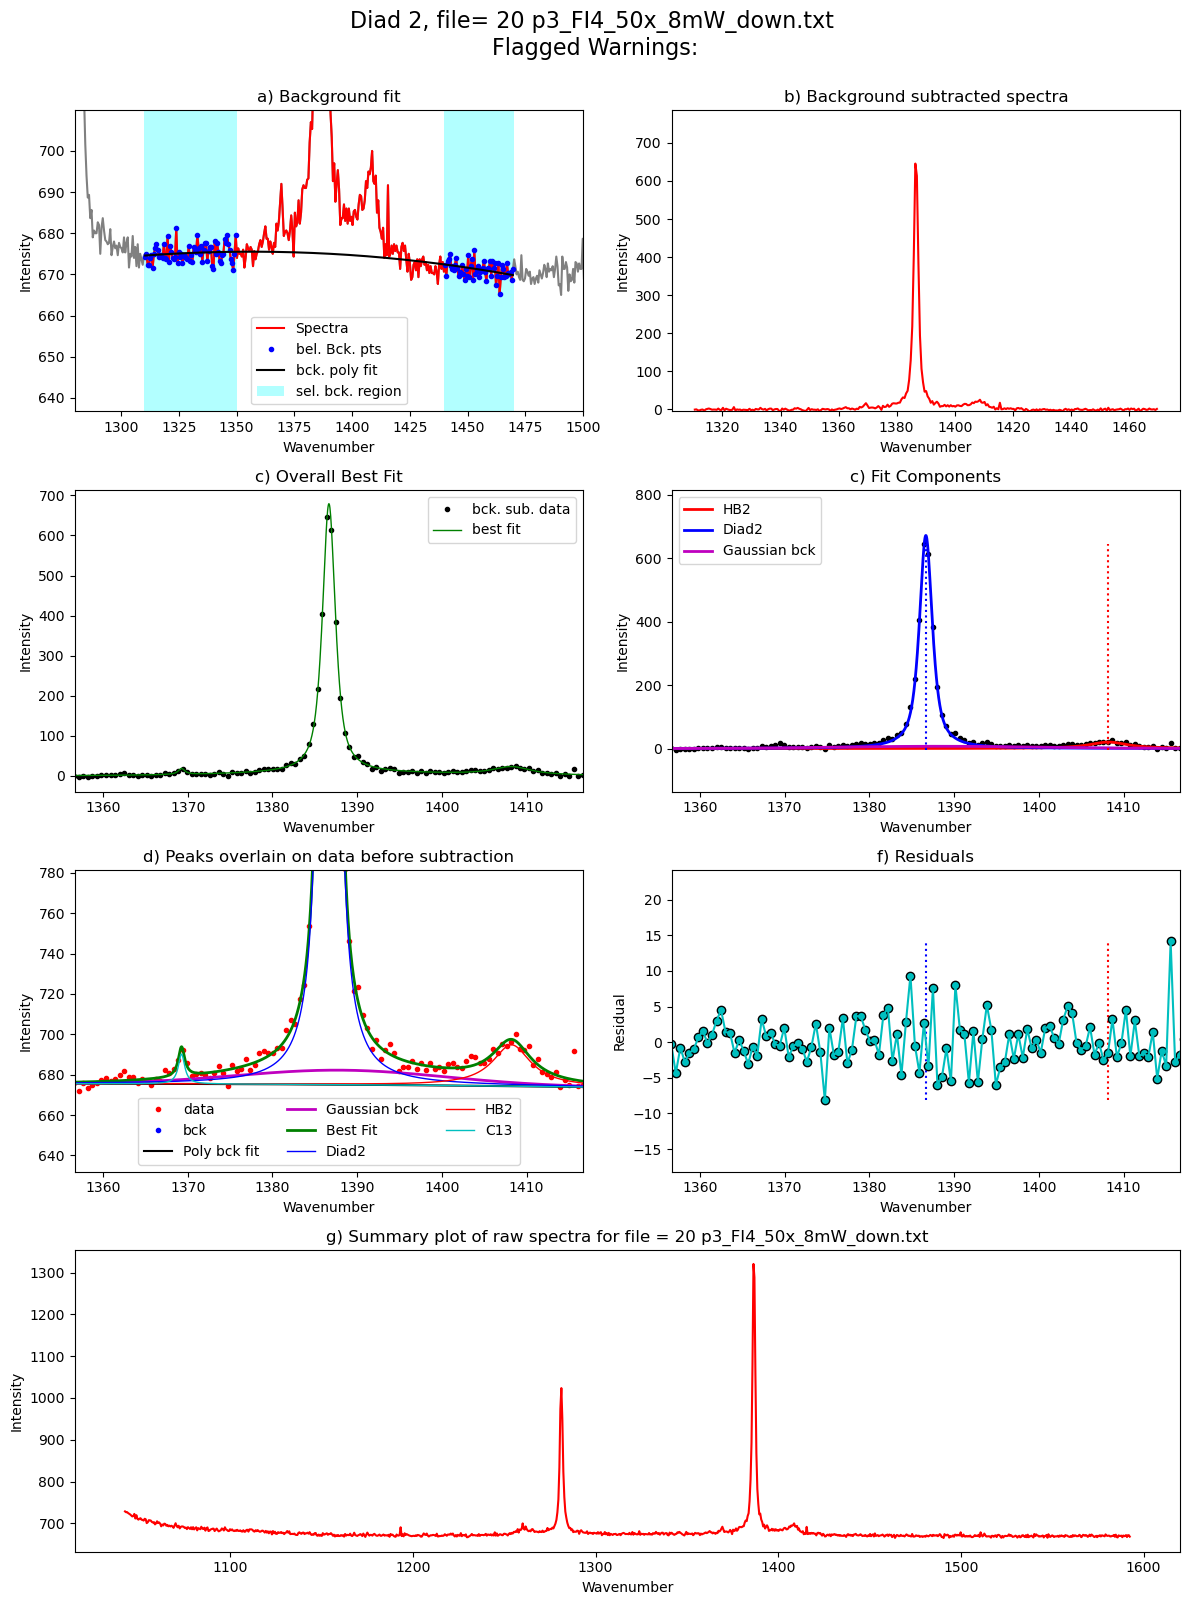

In [11]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]

Processing file: 20 p3_FI4_50x_8mW_down.txt


  8%|▊         | 1/12 [00:02<00:26,  2.43s/it]

Processing file: 22 p3_FI4_50x_4mW_CRR_DiadFit.txt


 17%|█▋        | 2/12 [00:04<00:21,  2.19s/it]

Processing file: 24 p3_FI2_100x_8mW.txt


 25%|██▌       | 3/12 [00:06<00:19,  2.16s/it]

Processing file: 25 p3_FI2_100x_12mW.txt


 33%|███▎      | 4/12 [00:08<00:17,  2.21s/it]

Processing file: 27 p3_FI3_100x_12mW.txt


 42%|████▏     | 5/12 [00:10<00:15,  2.16s/it]

Processing file: 31 p3_FI1_100x_12mW.txt


 50%|█████     | 6/12 [00:13<00:14,  2.43s/it]

Processing file: 32 c1_FI2_50X_8mW.txt


 58%|█████▊    | 7/12 [00:16<00:12,  2.48s/it]

Processing file: 34 c1_FI1_100X_12mW.txt


 67%|██████▋   | 8/12 [00:21<00:13,  3.35s/it]

Processing file: 35 c1_FI4_50X_8mW.txt


 75%|███████▌  | 9/12 [00:23<00:08,  2.86s/it]

Processing file: 42 p2_FI1_50X_8mW_CRR_DiadFit.txt


 83%|████████▎ | 10/12 [00:27<00:06,  3.24s/it]

Processing file: 43 p2_FI5_100X_15mw.txt


/Users/gleesonm/anaconda3/lib/python3.11/site-packages/DiadFit/diads.py:3106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
 92%|█████████▏| 11/12 [00:32<00:03,  3.65s/it]

Processing file: 44 p2_FI2_100X_15mW_CRR_DiadFit.txt


100%|██████████| 12/12 [00:35<00:00,  2.95s/it]


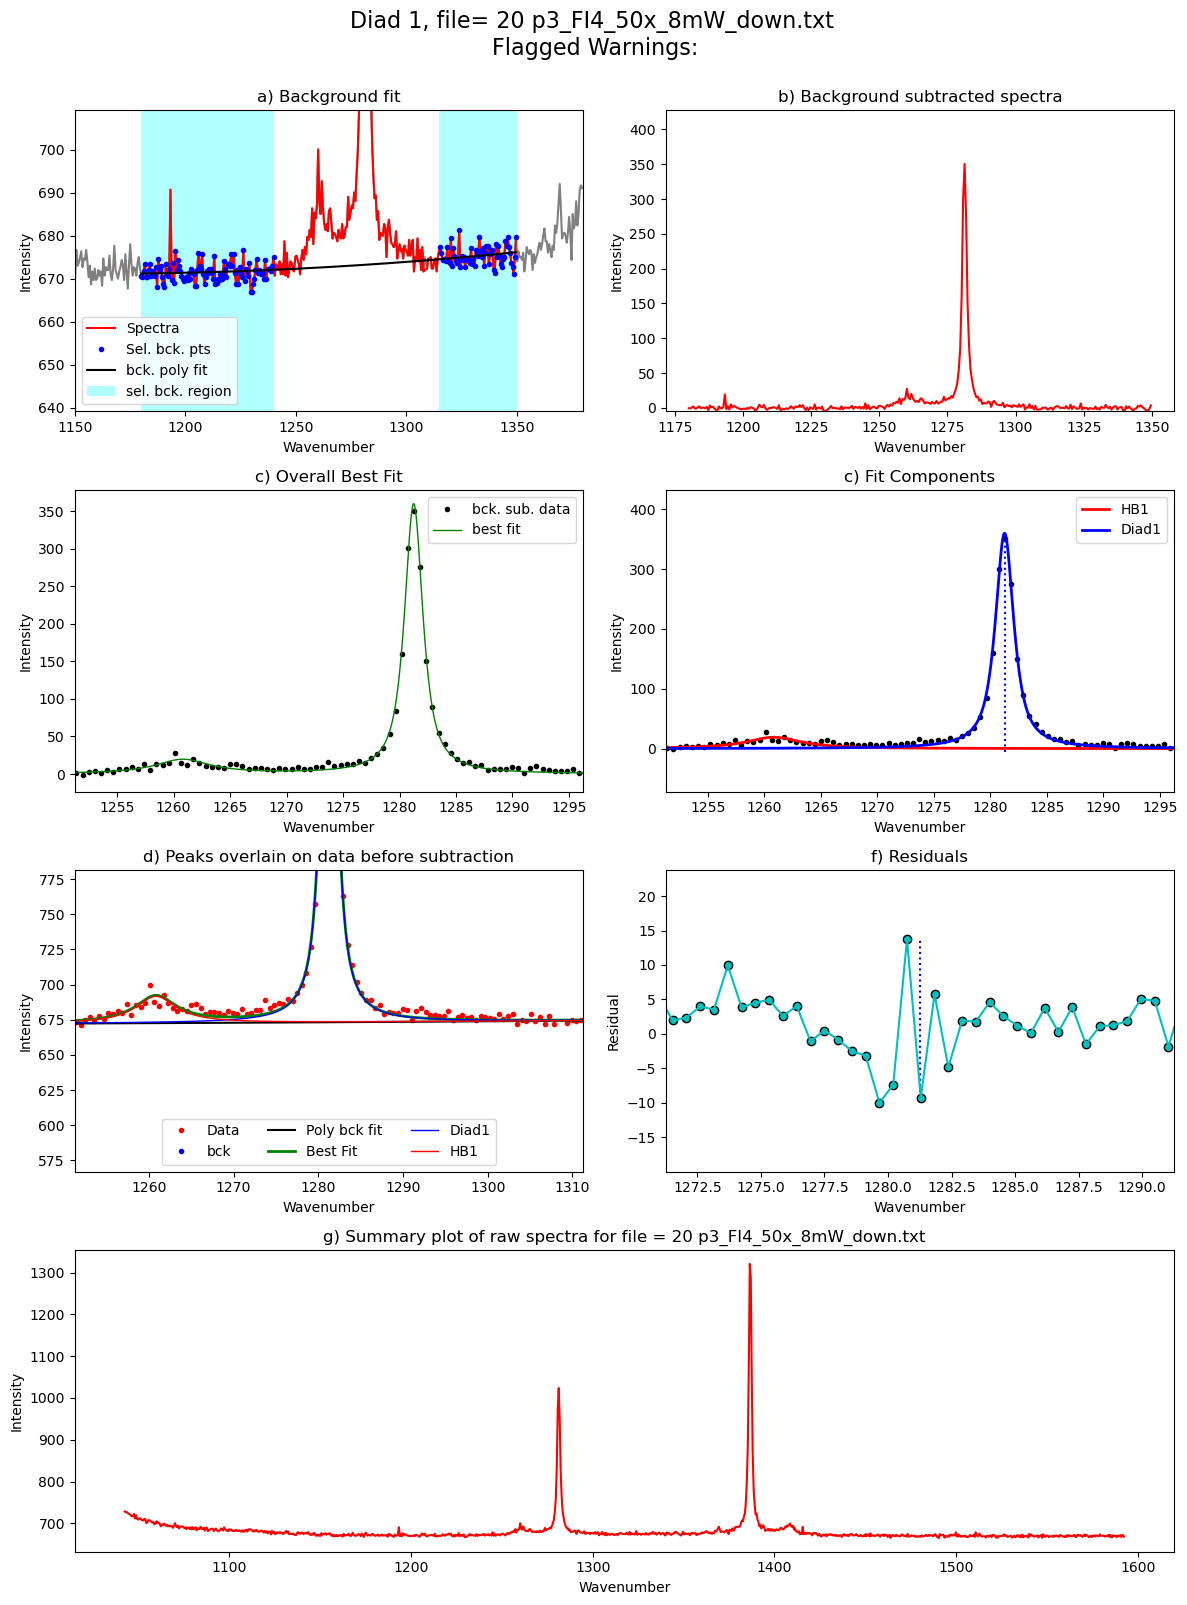

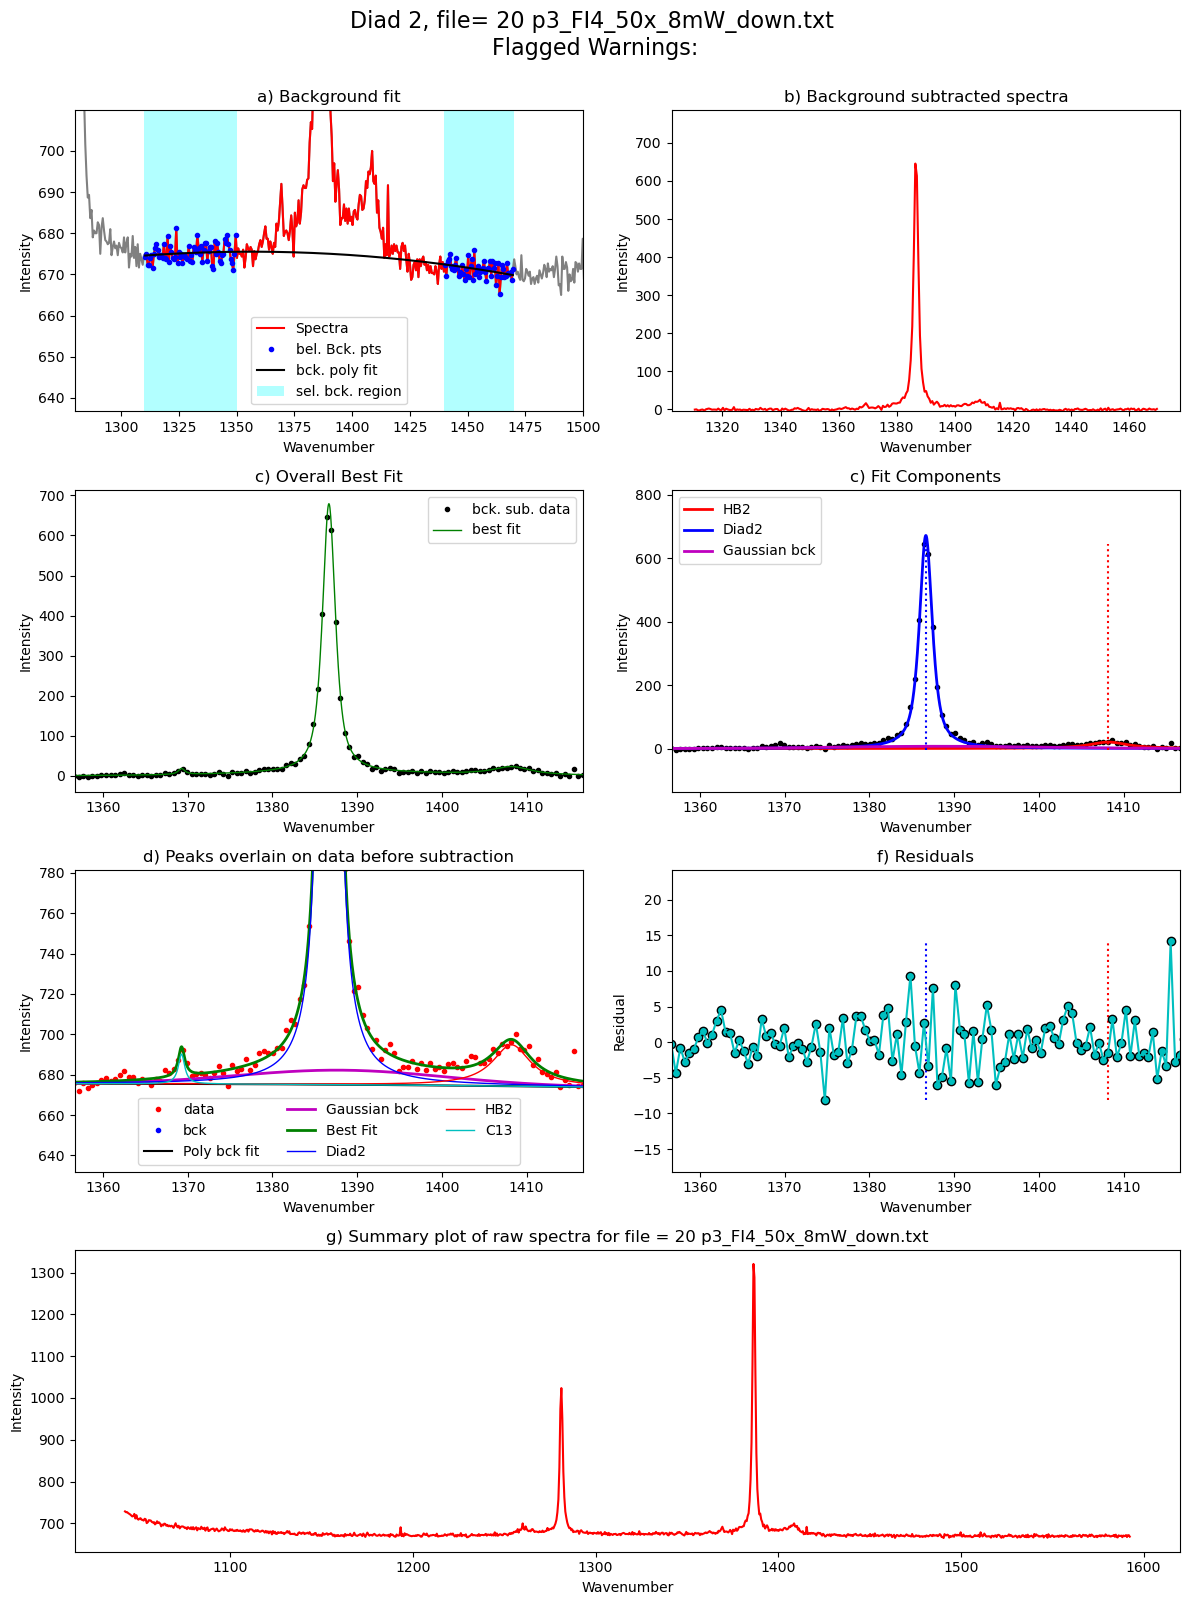

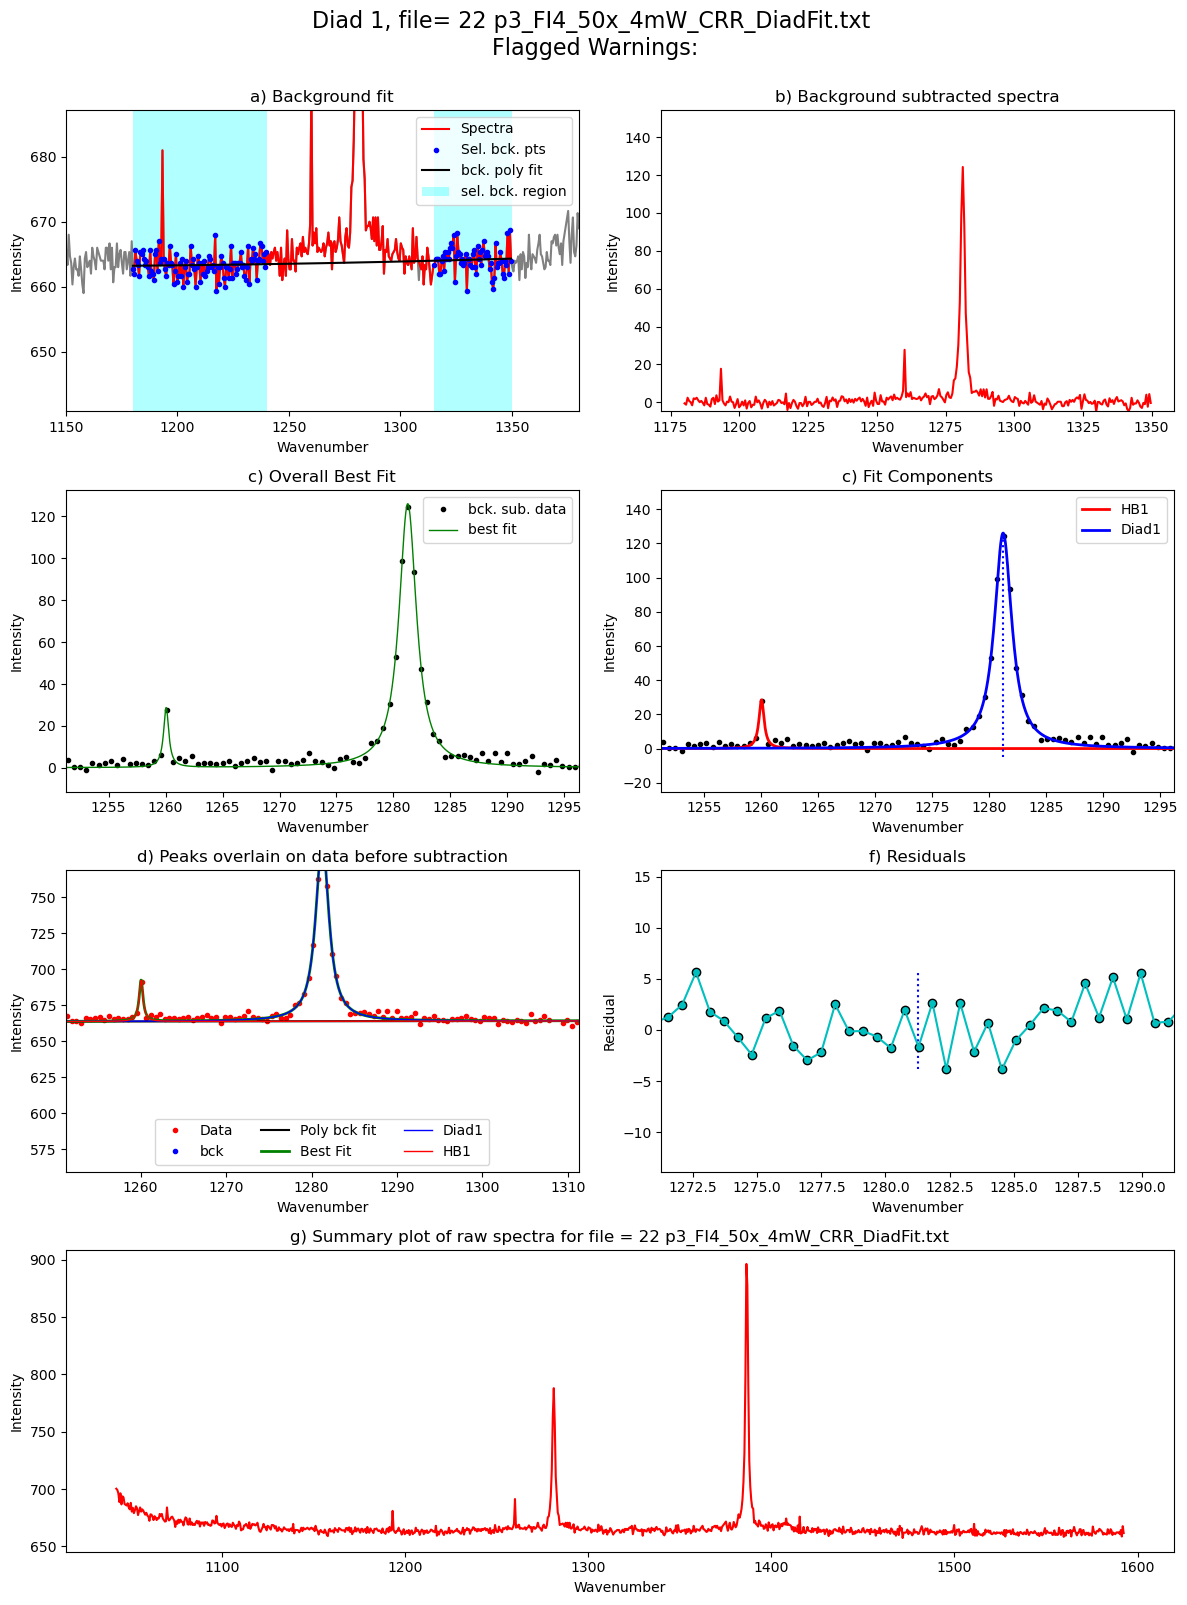

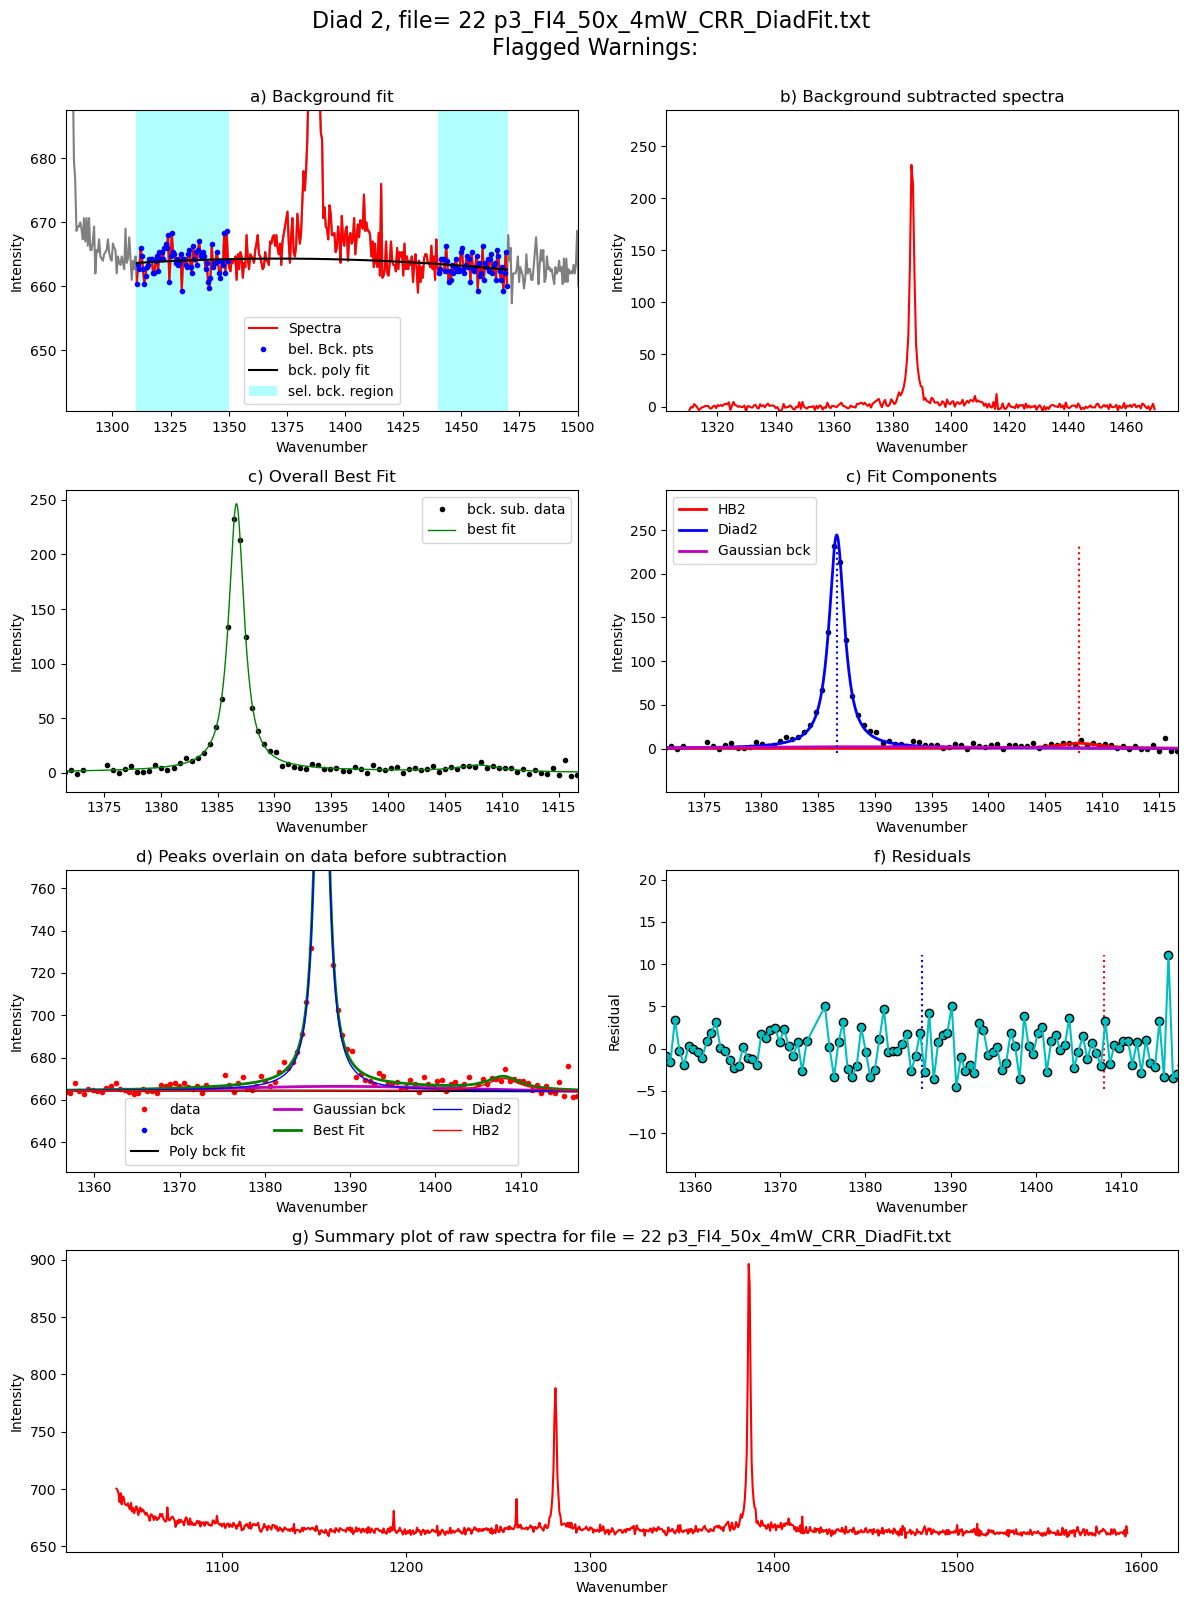

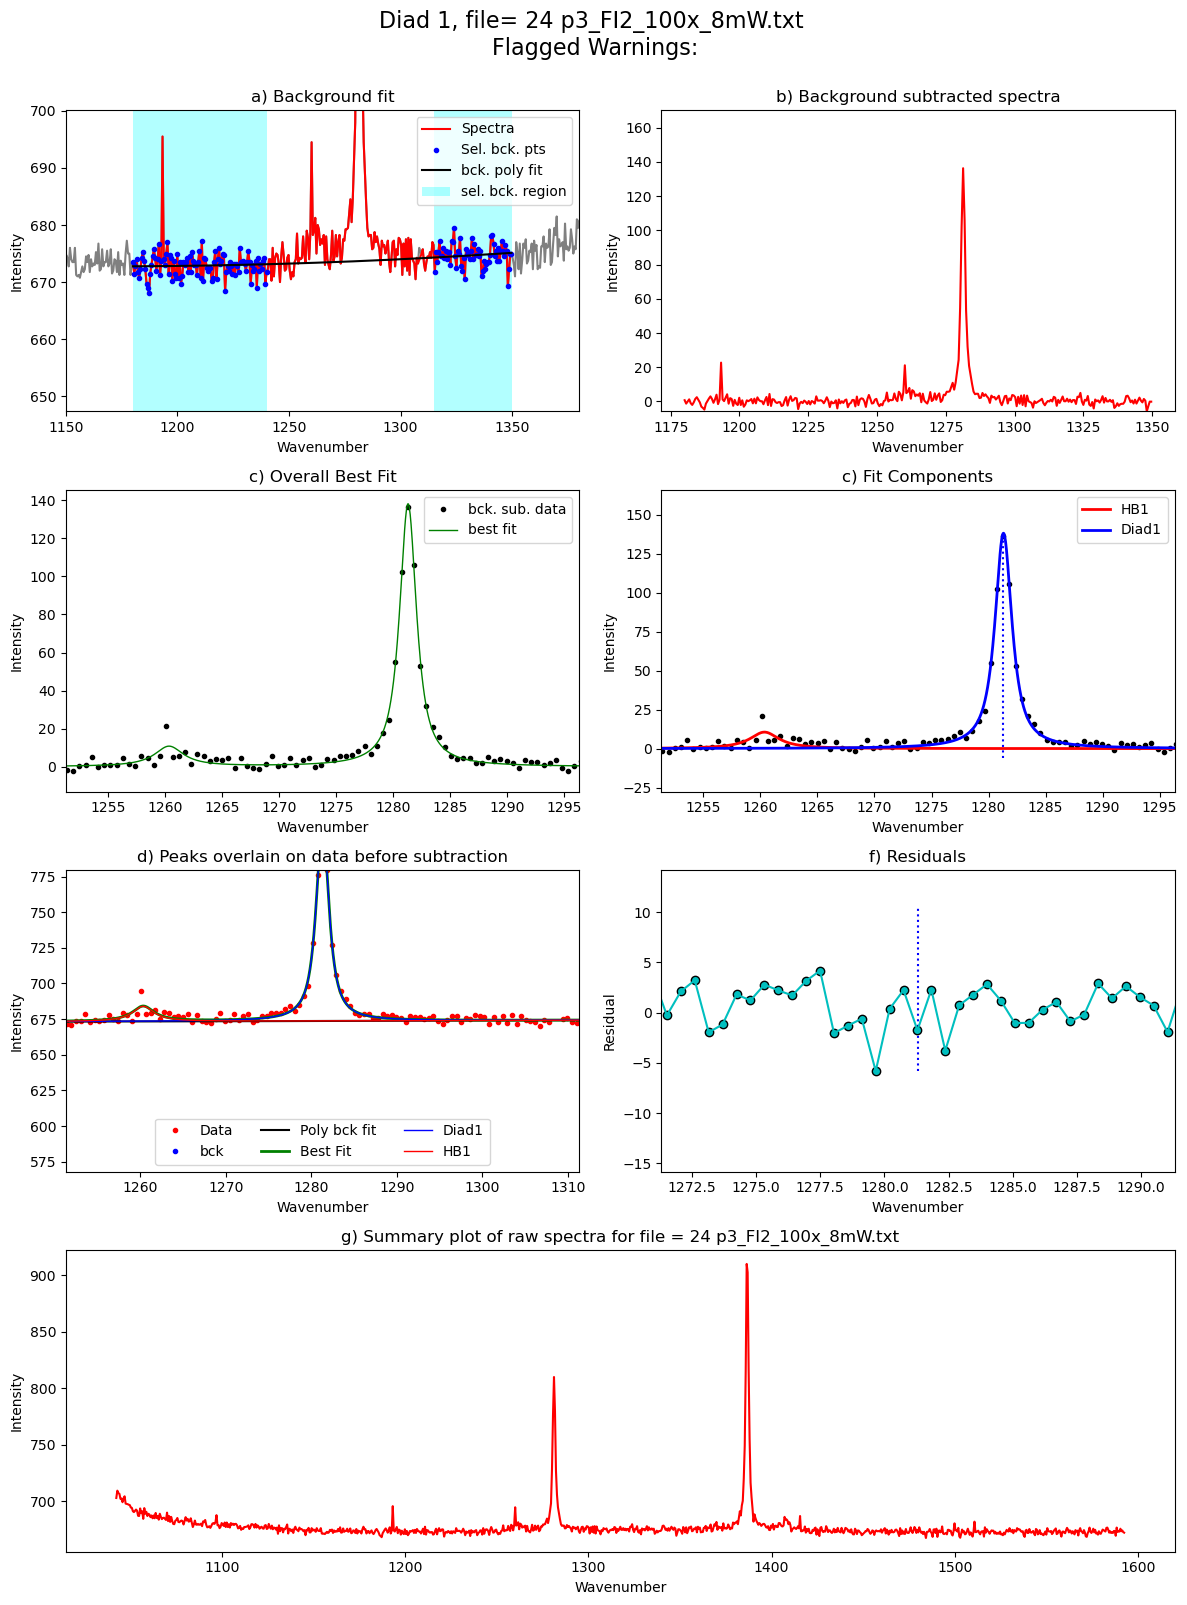

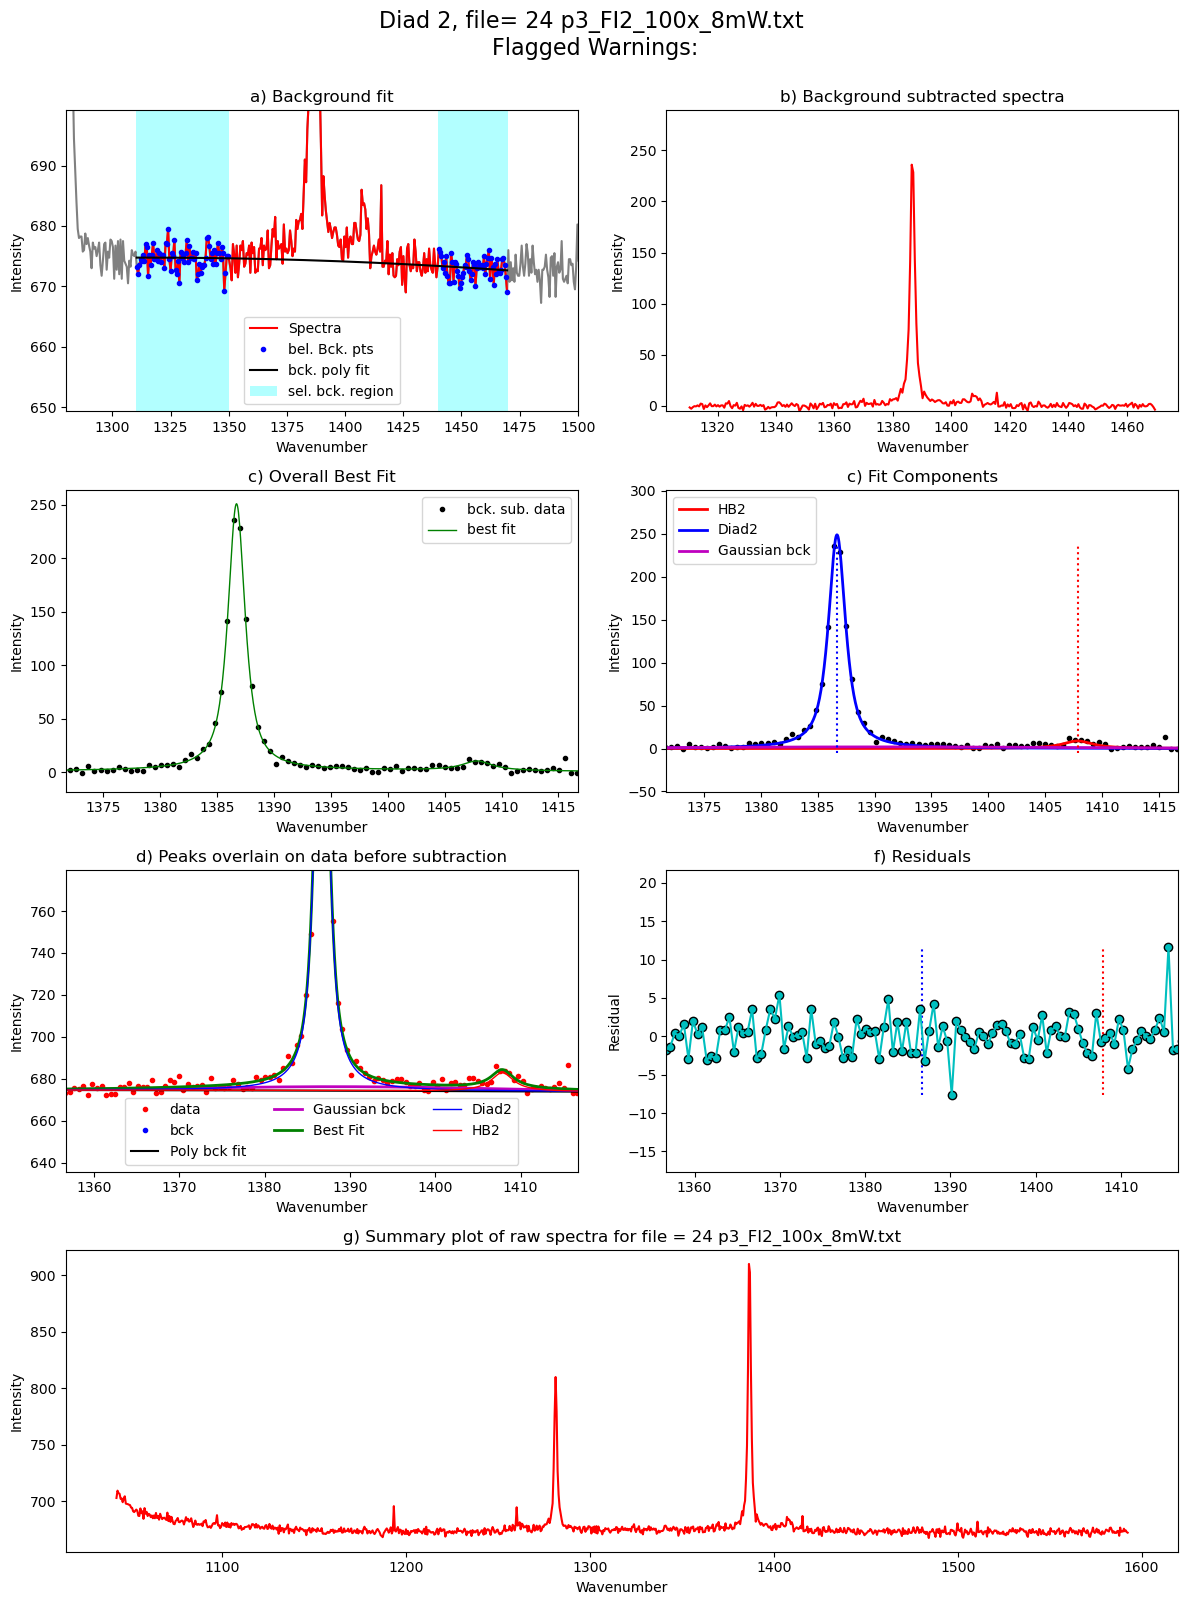

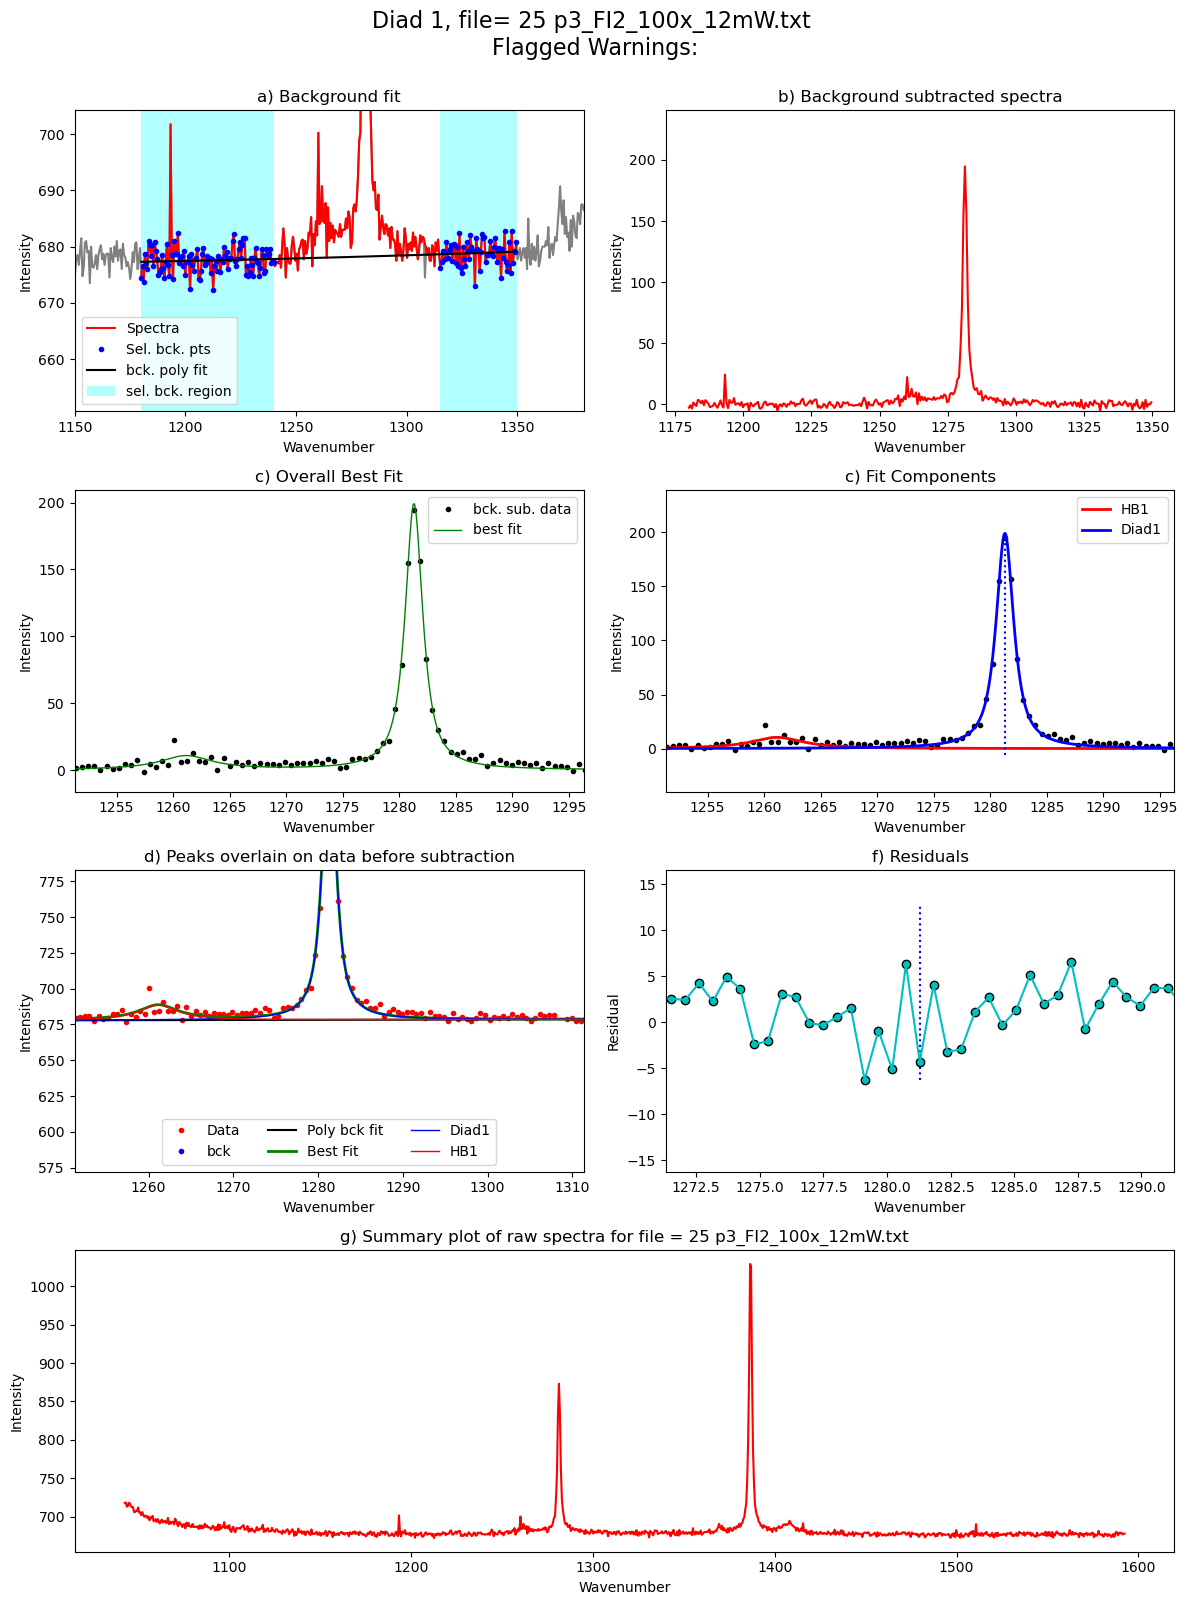

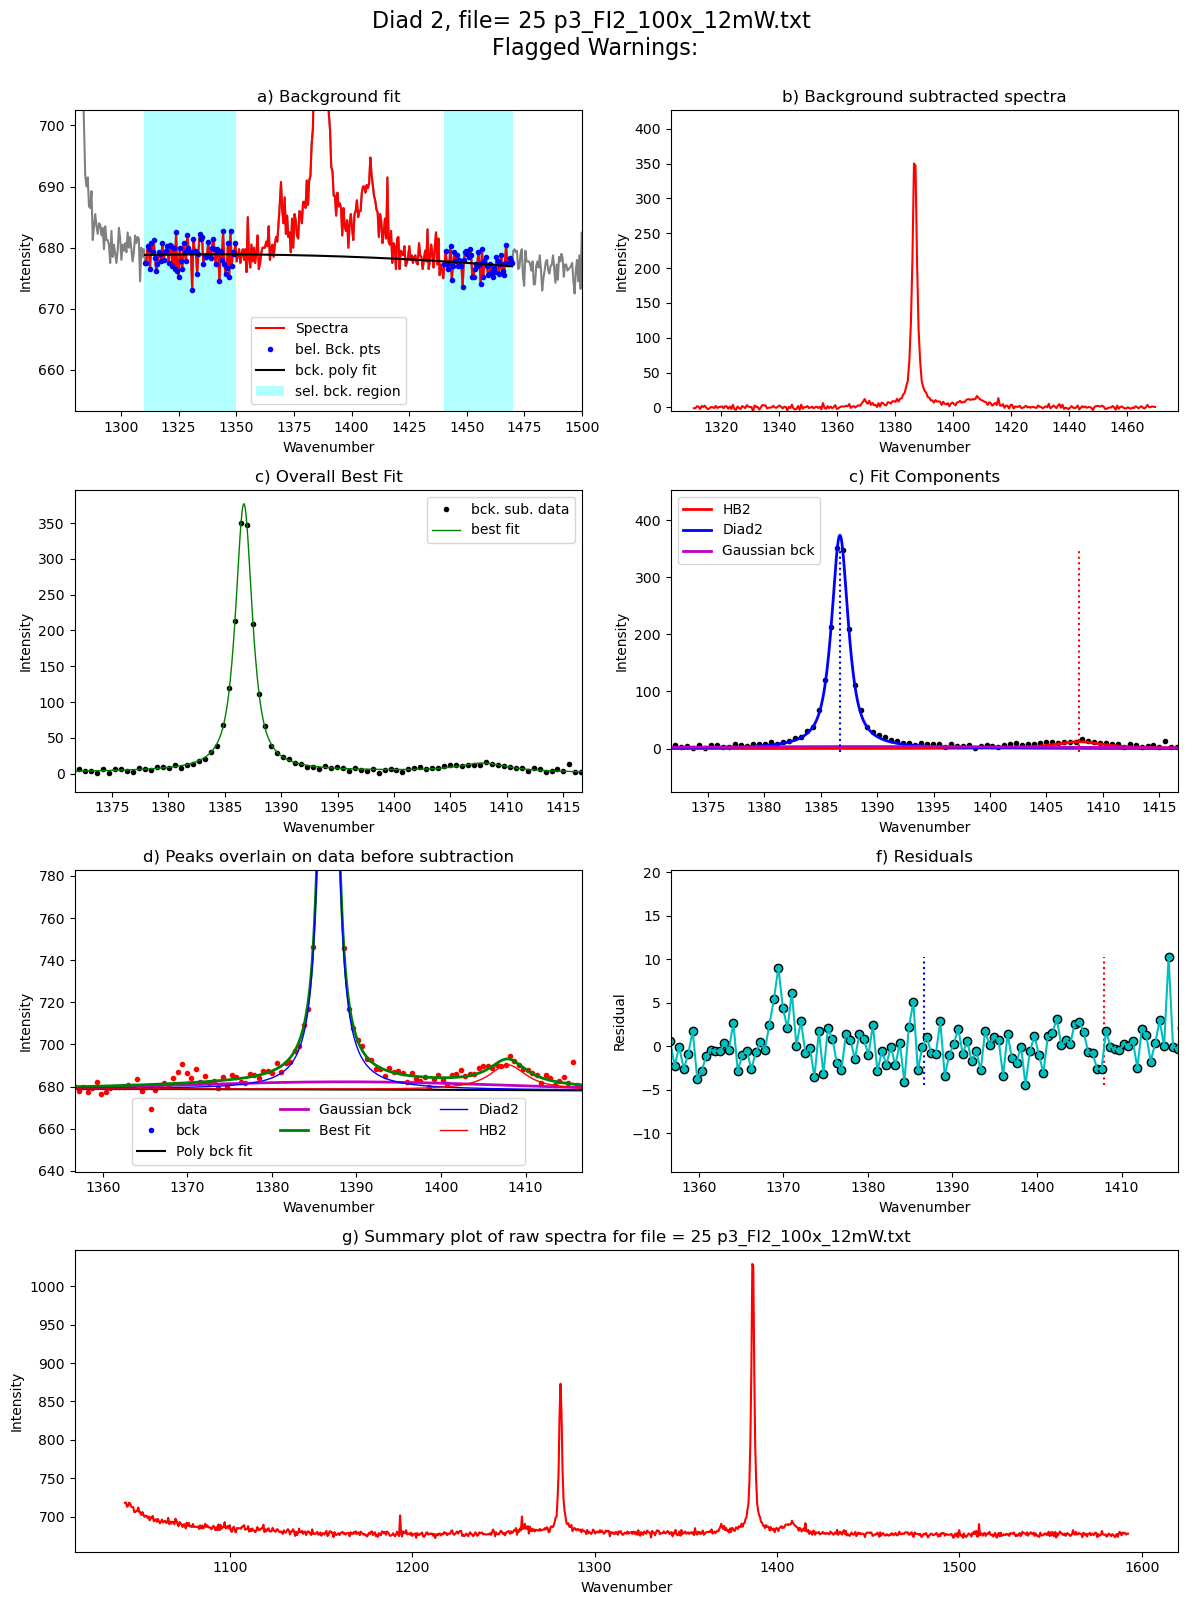

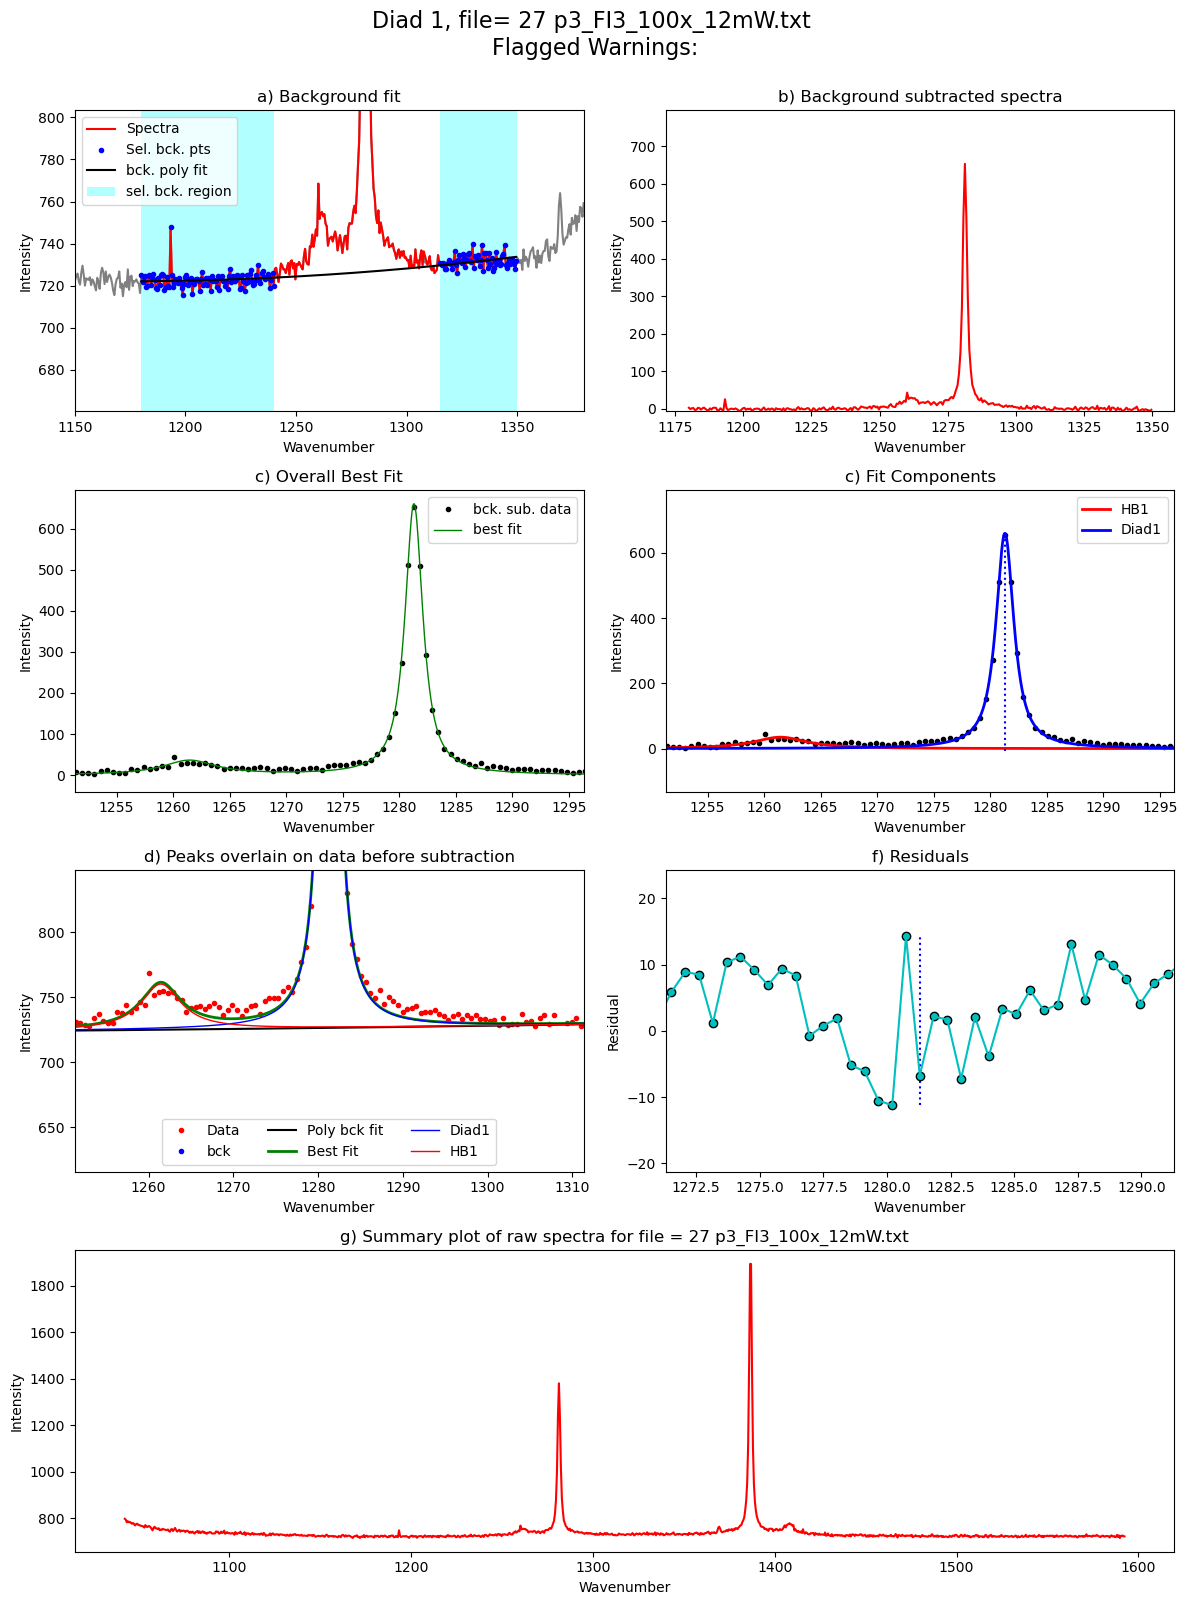

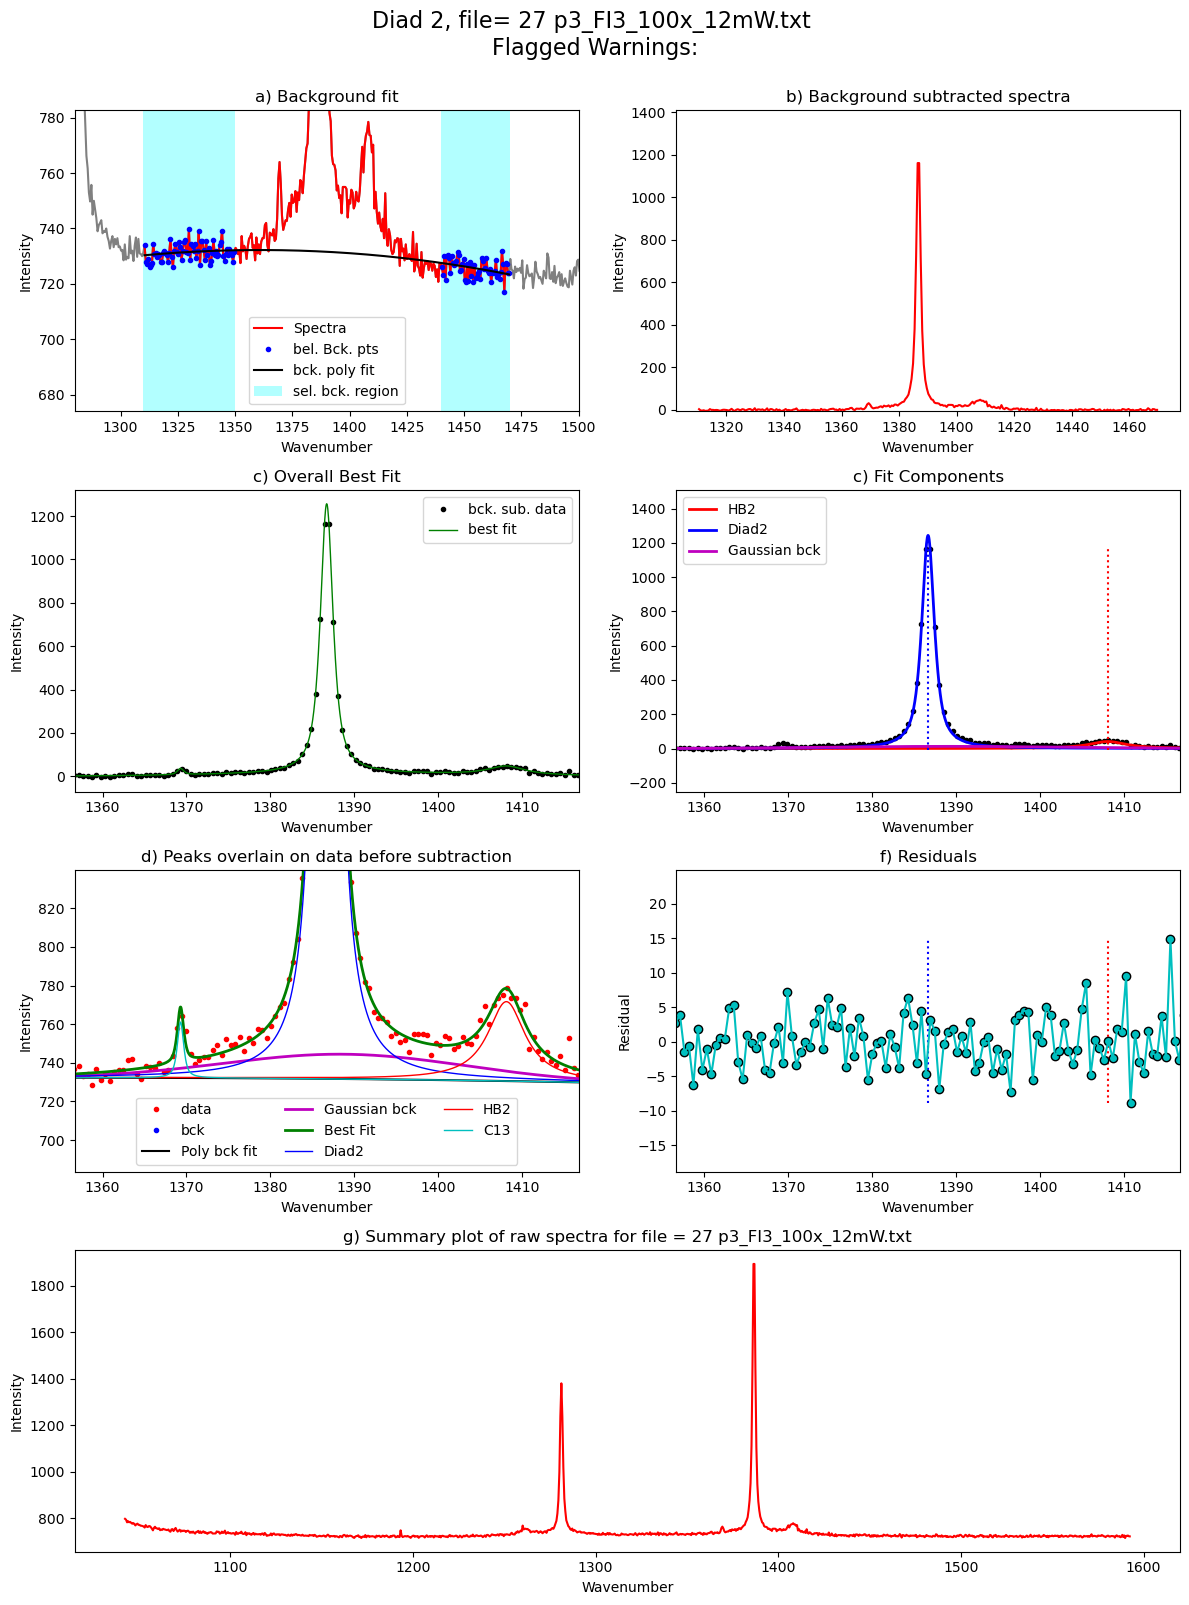

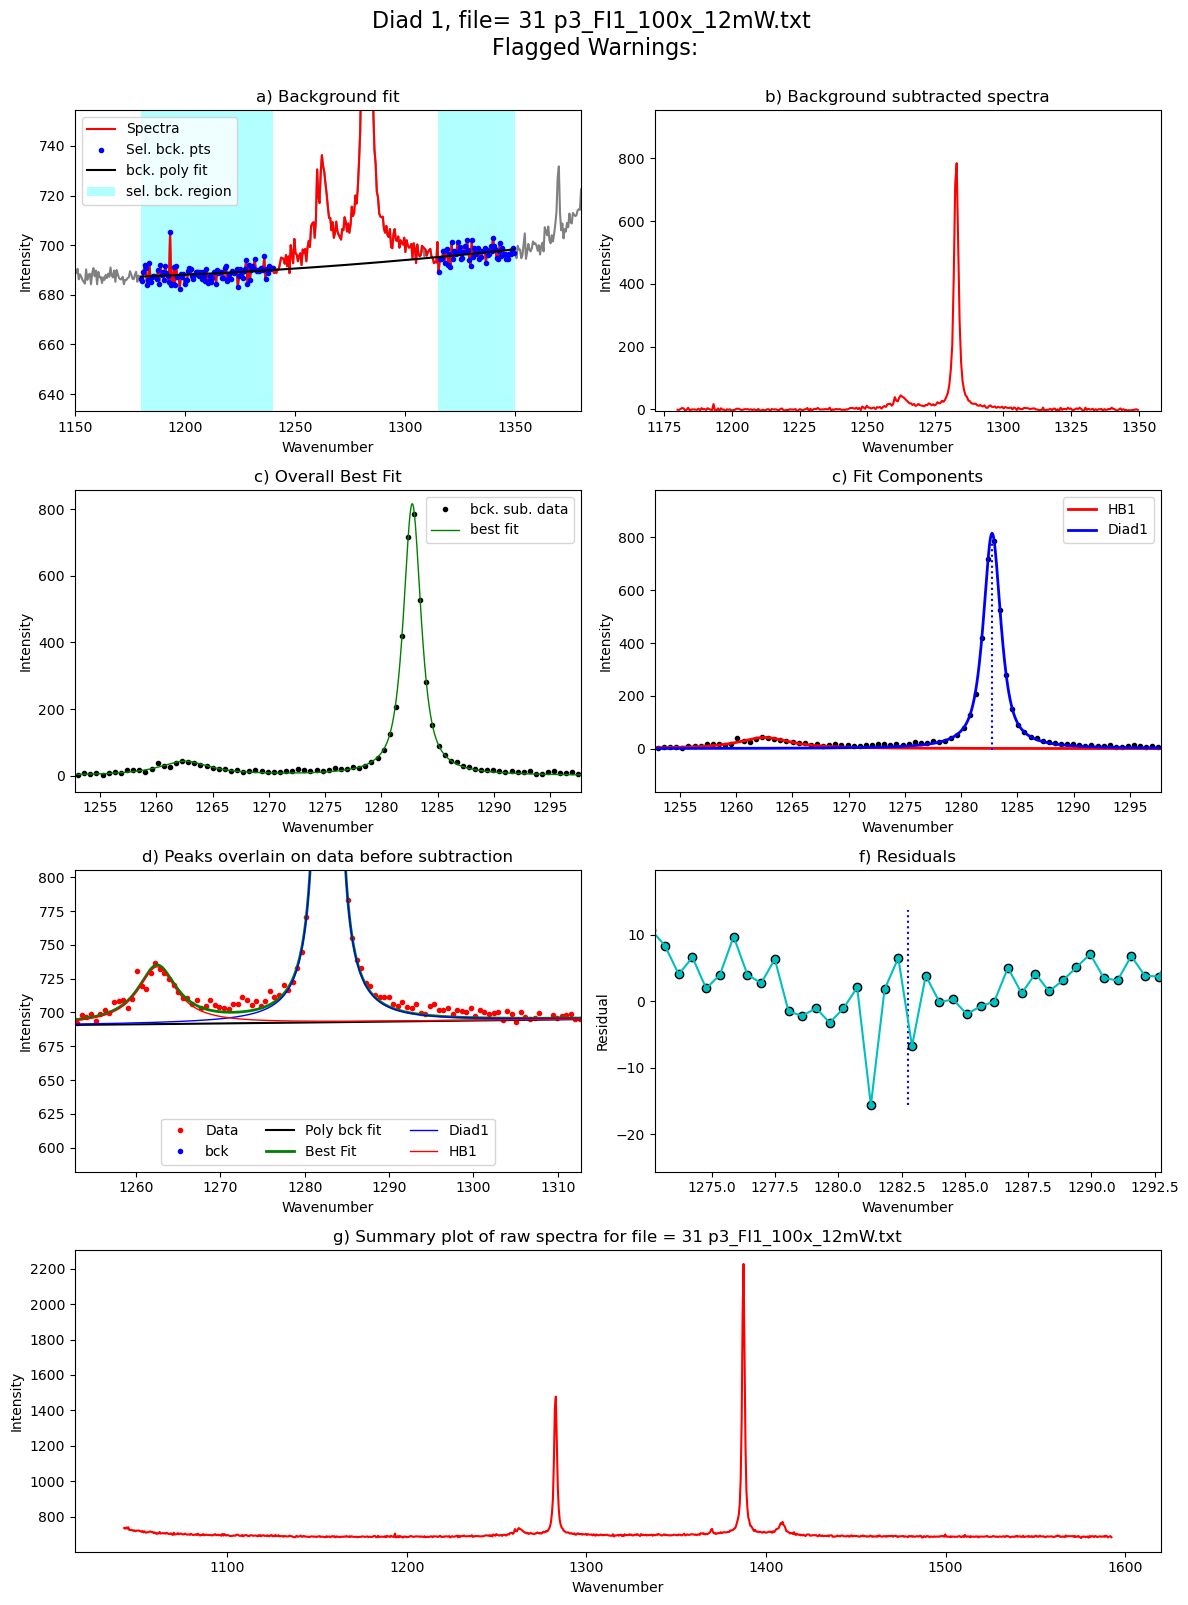

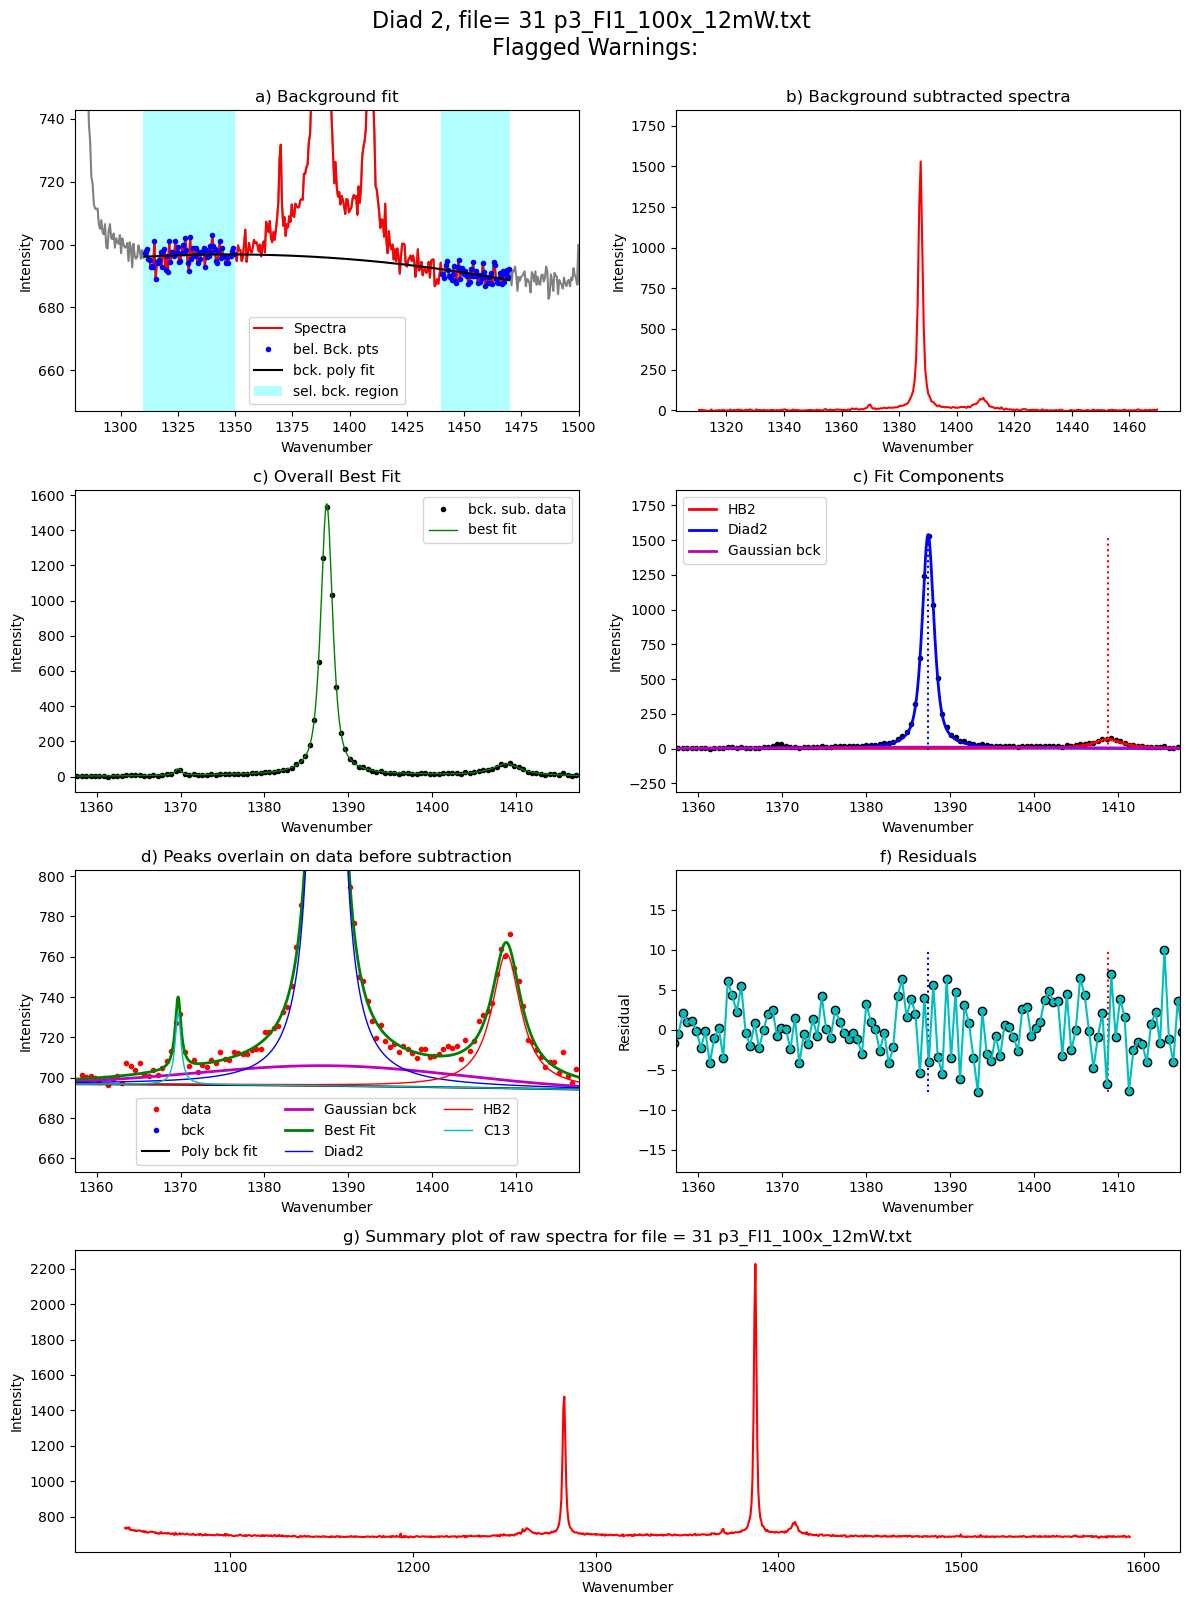

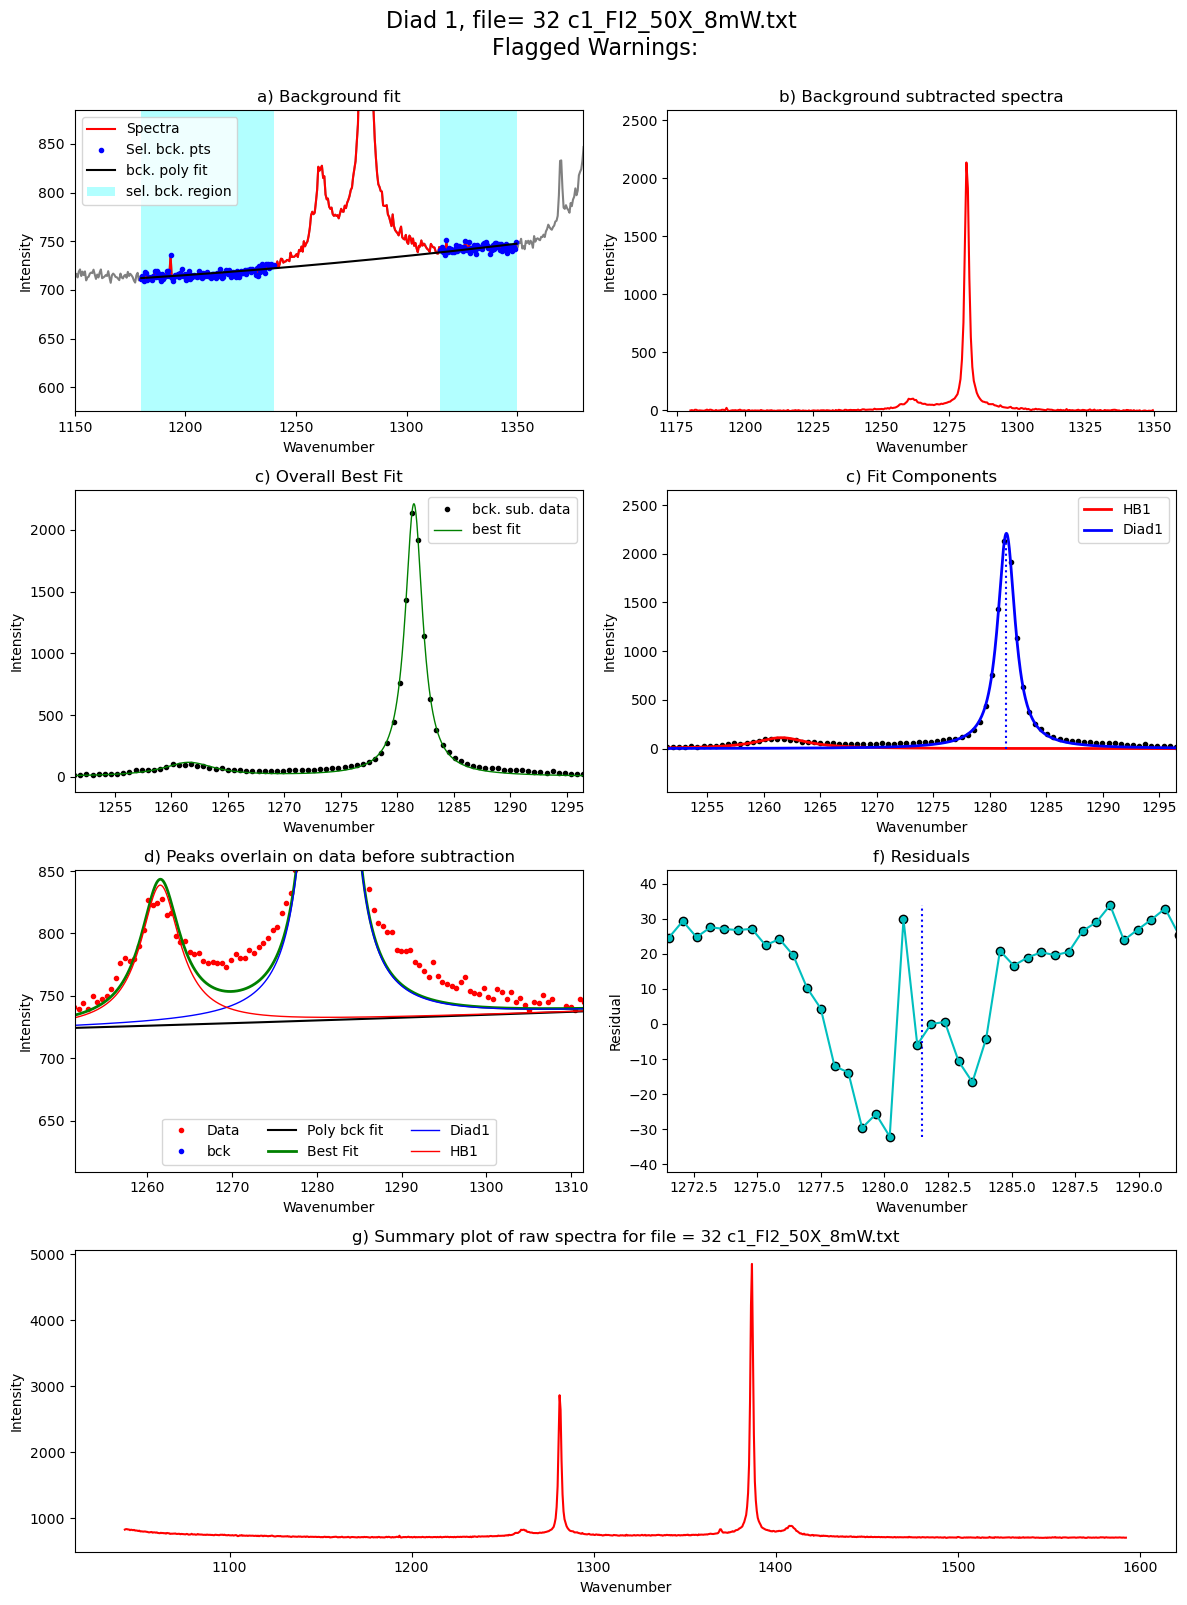

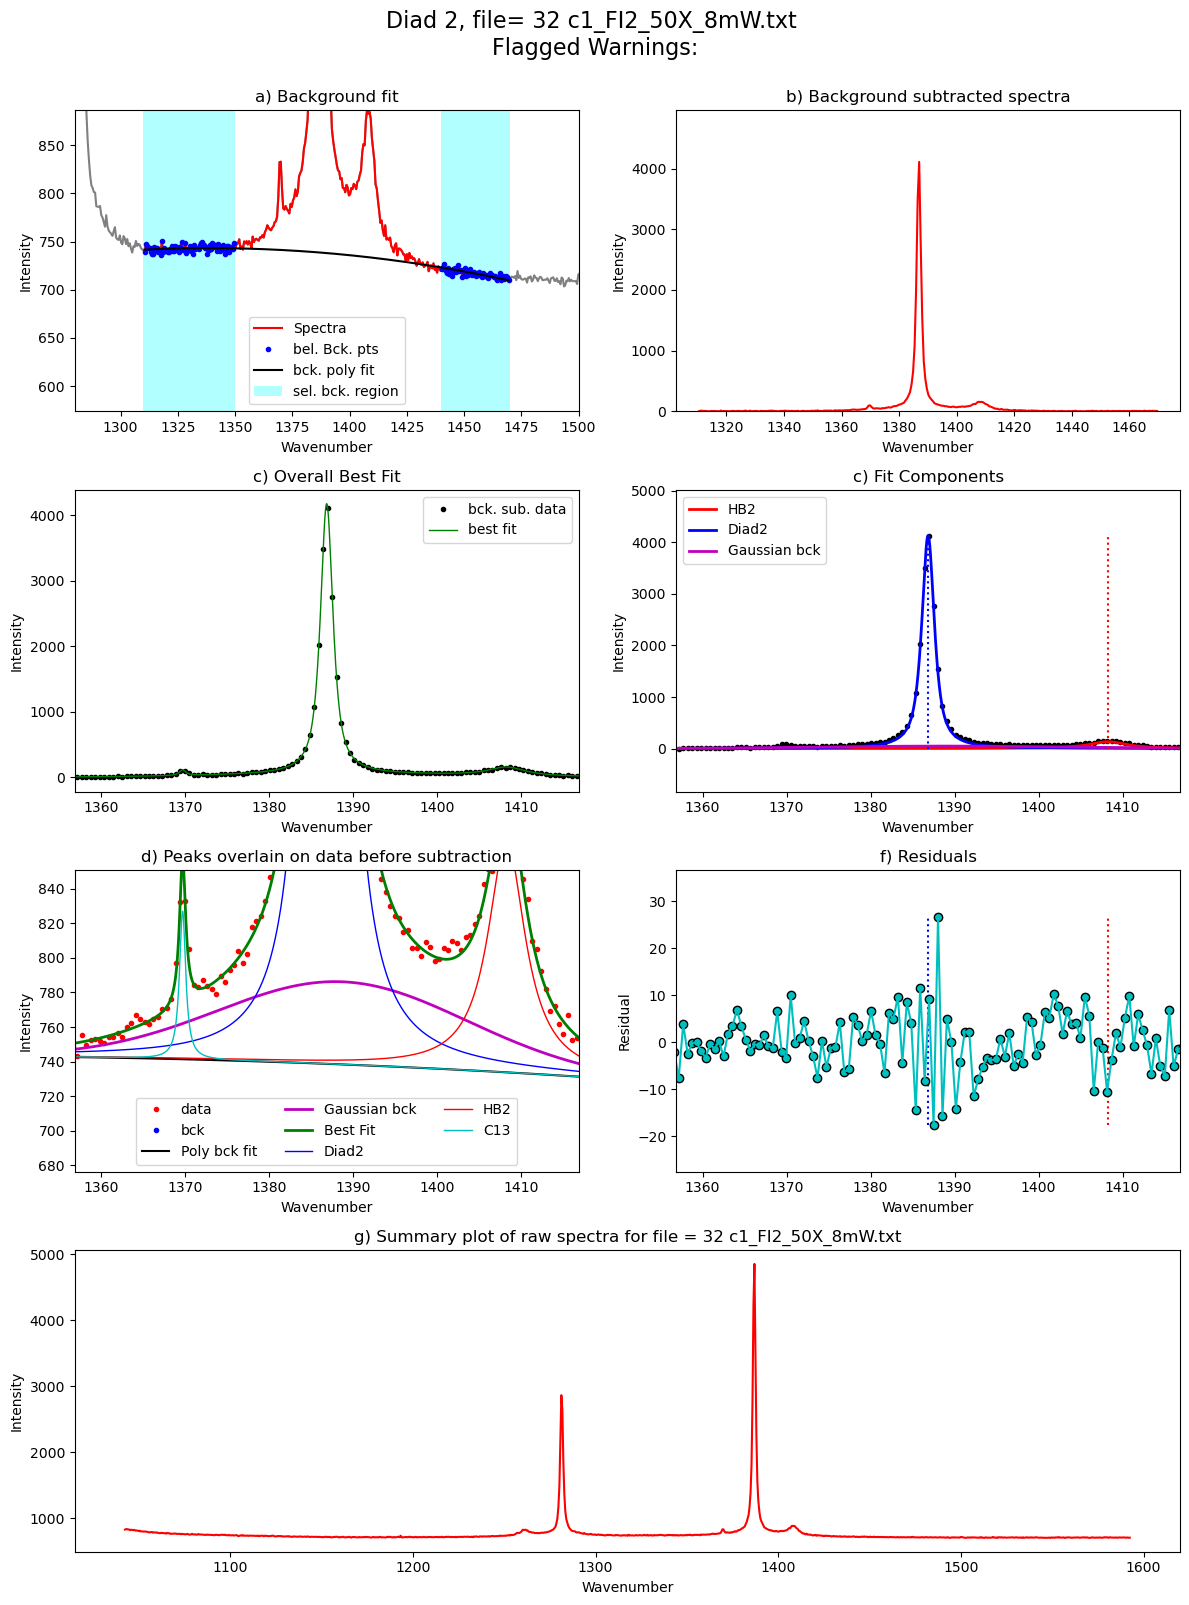

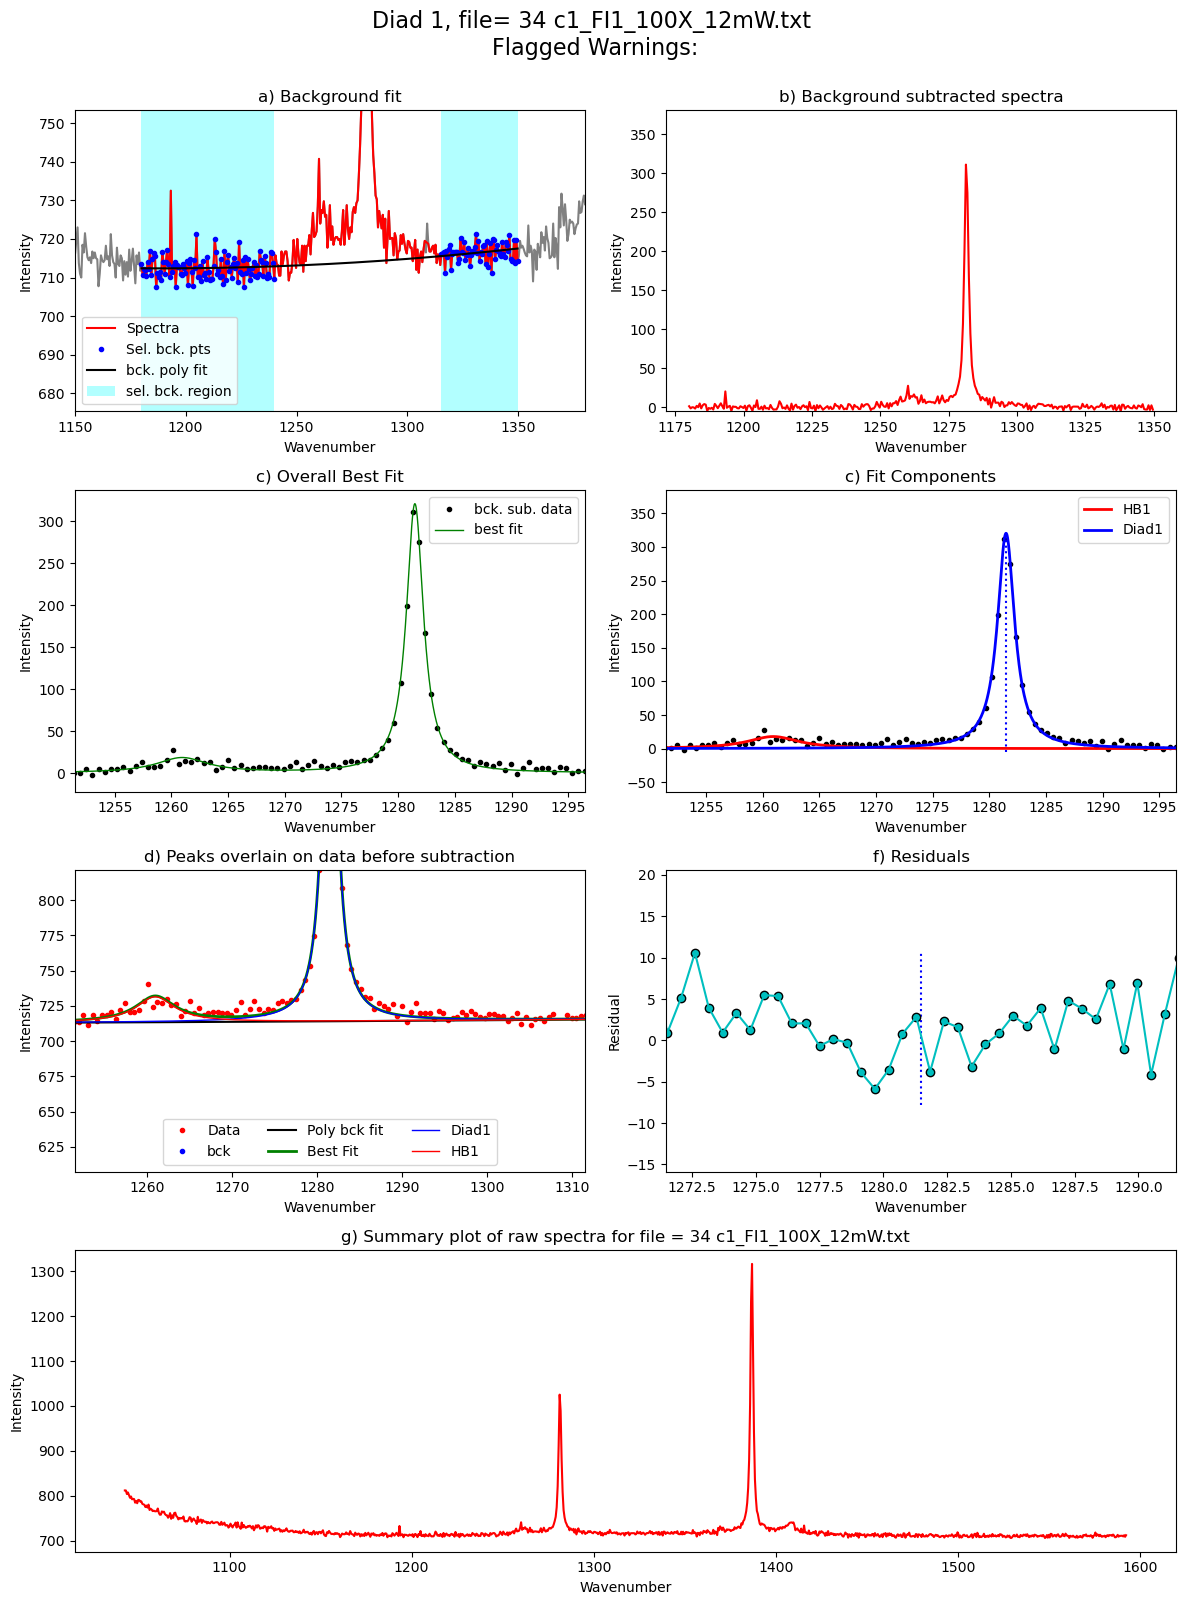

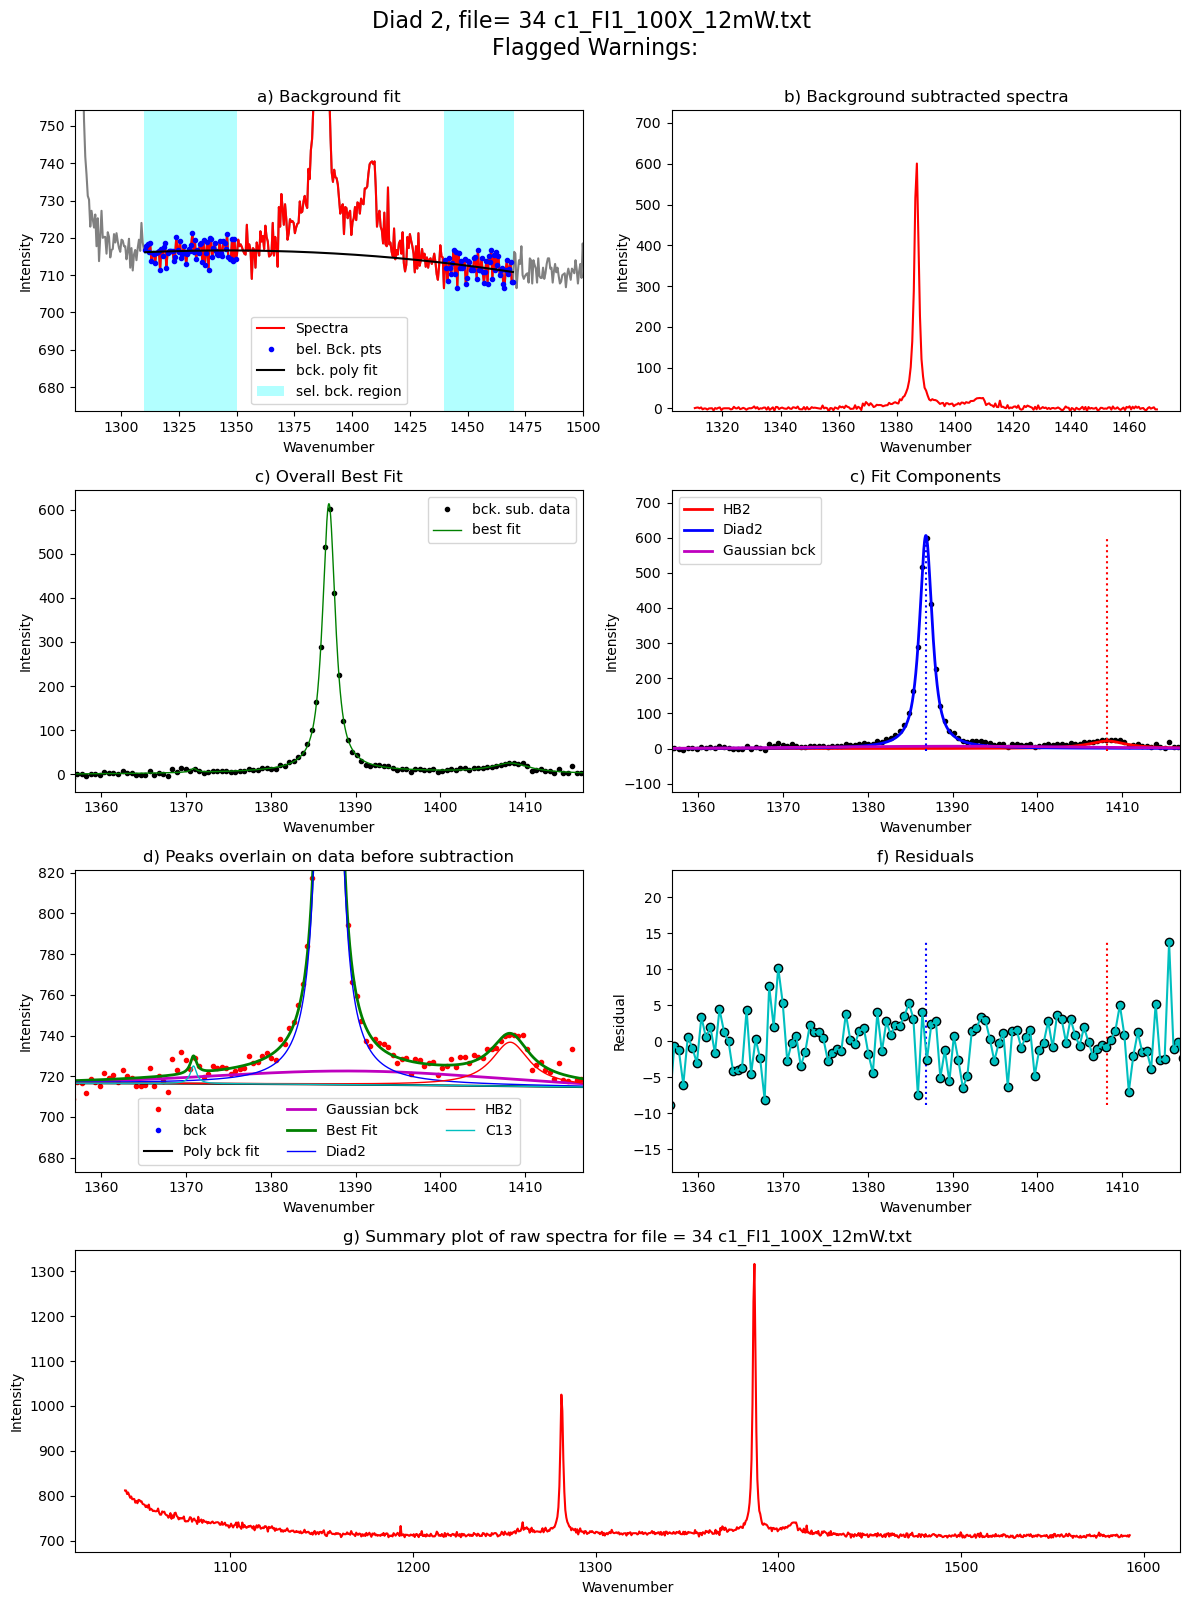

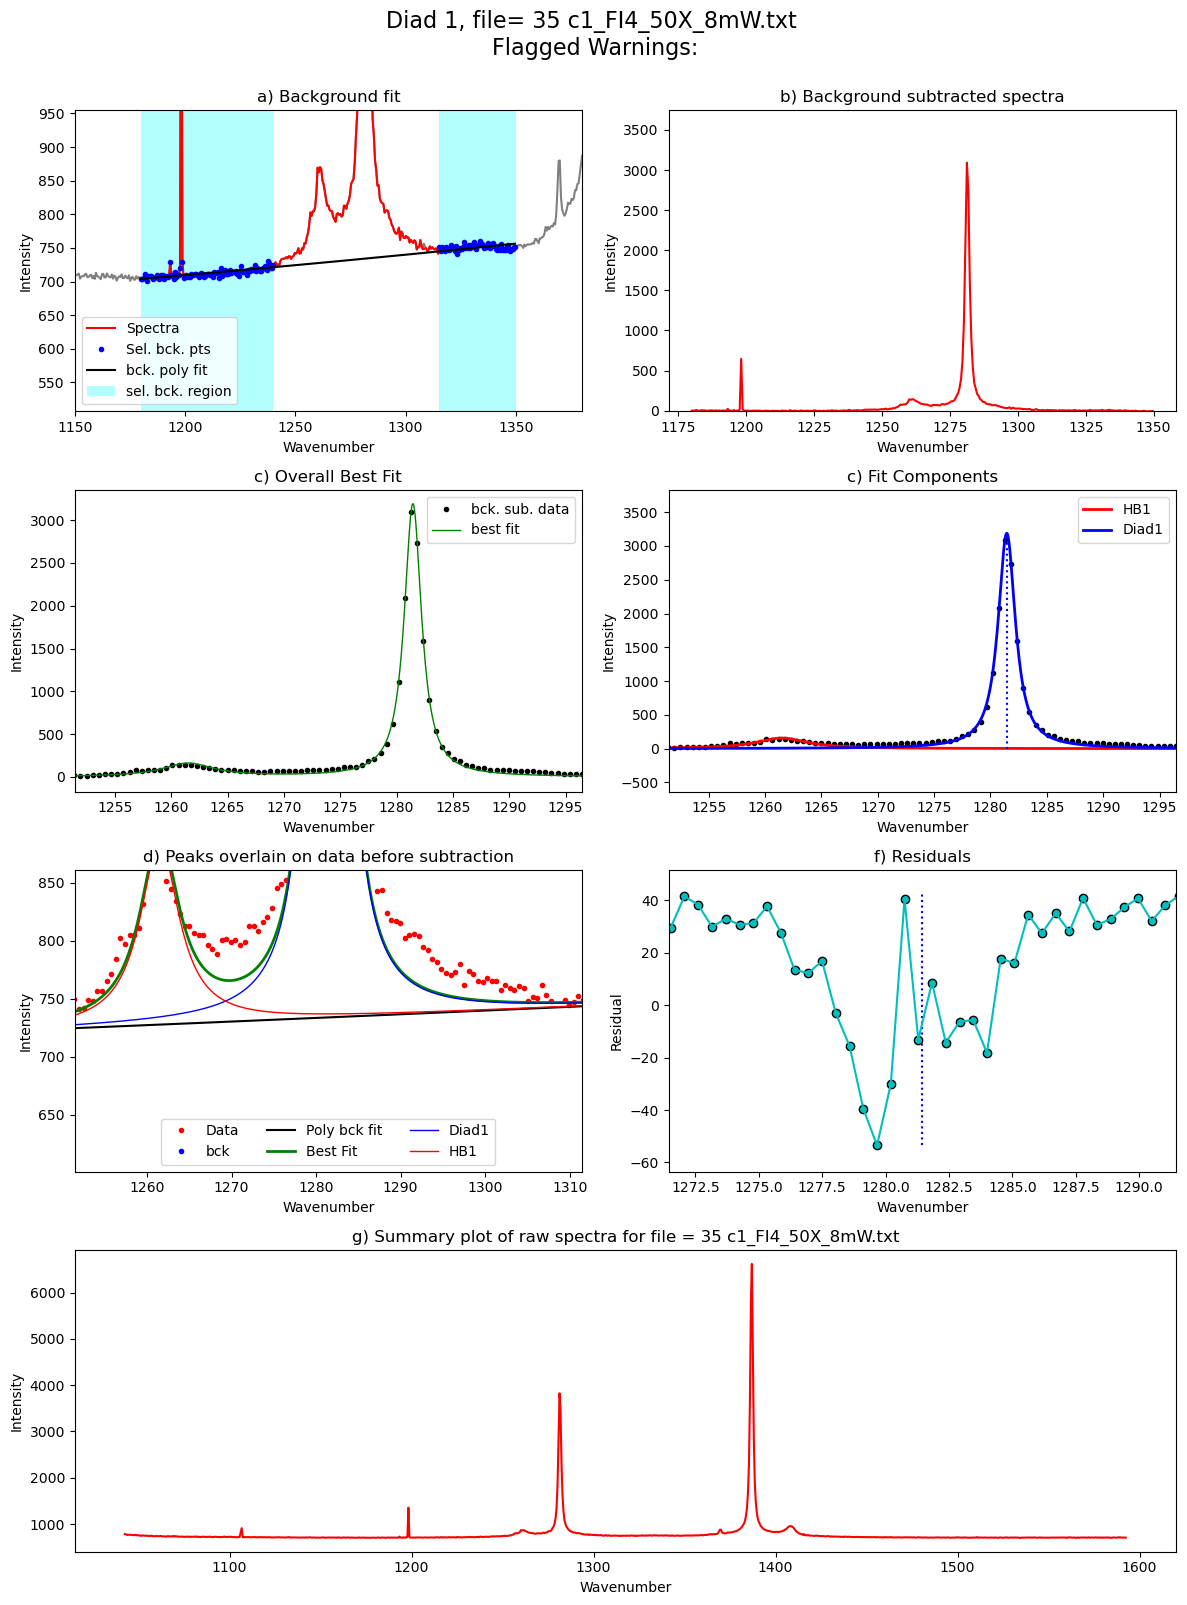

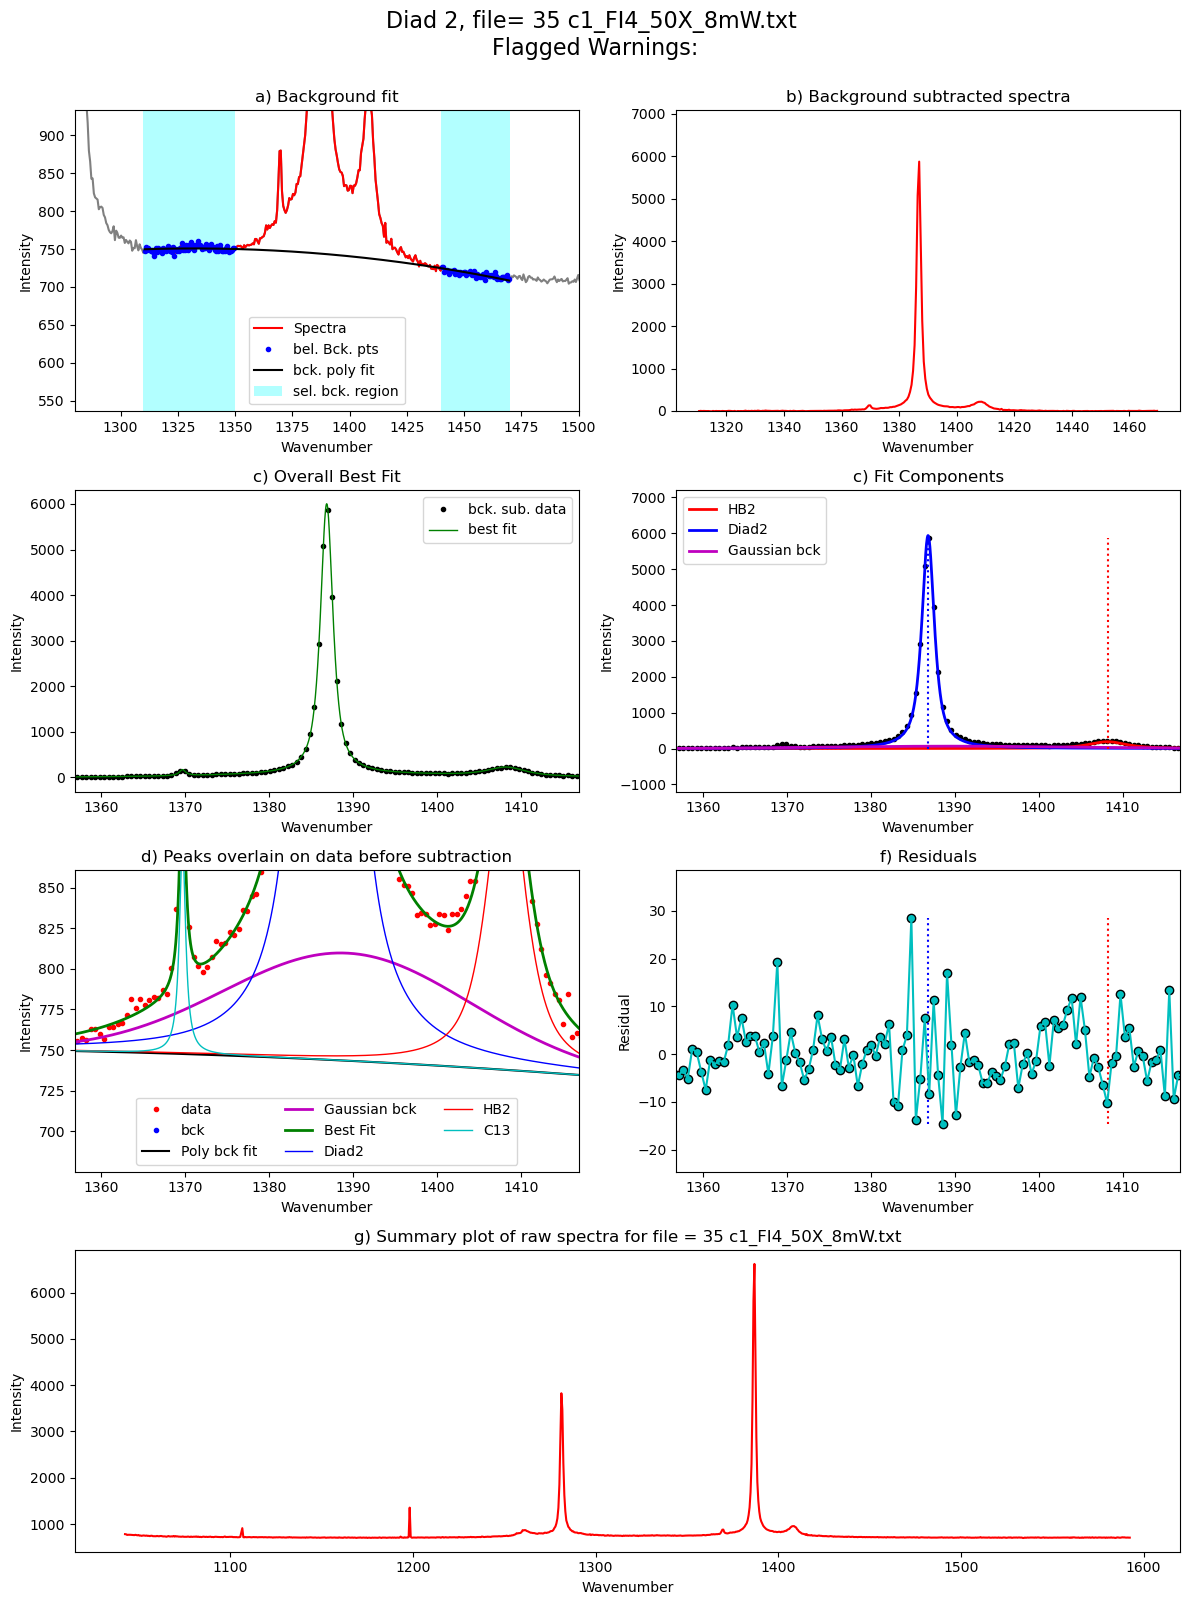

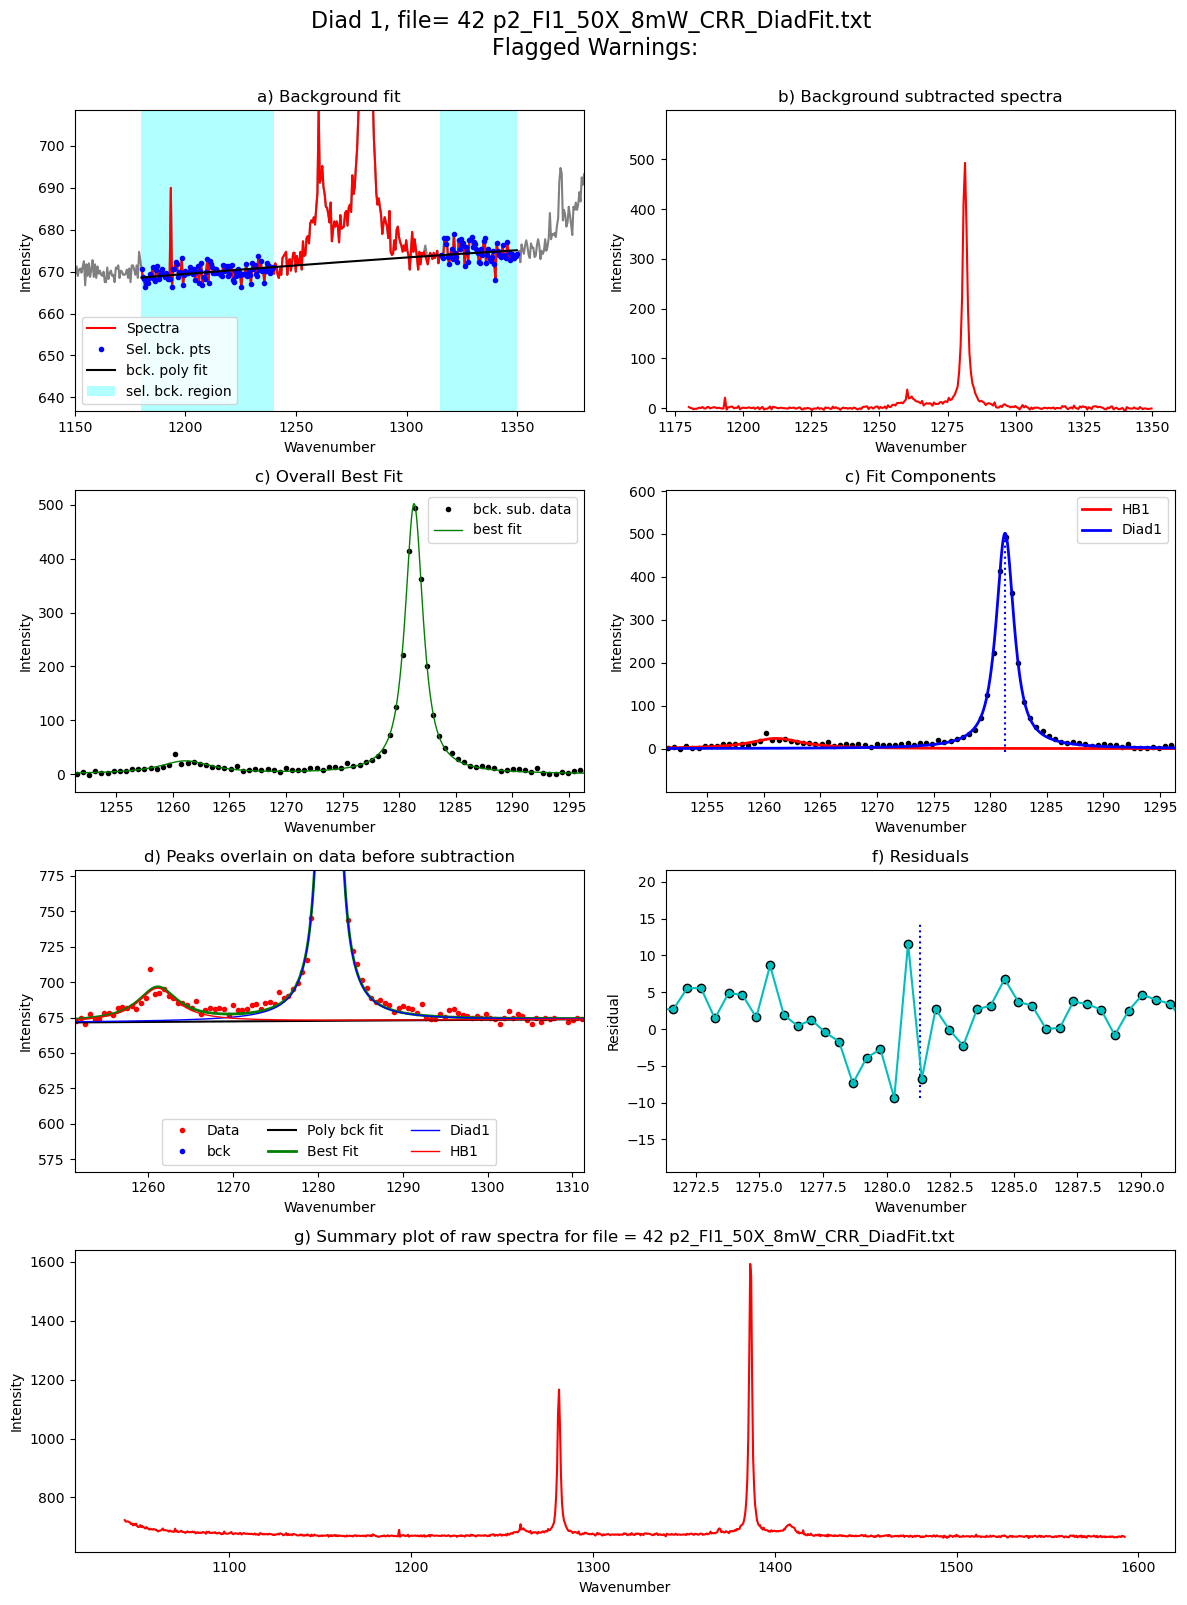

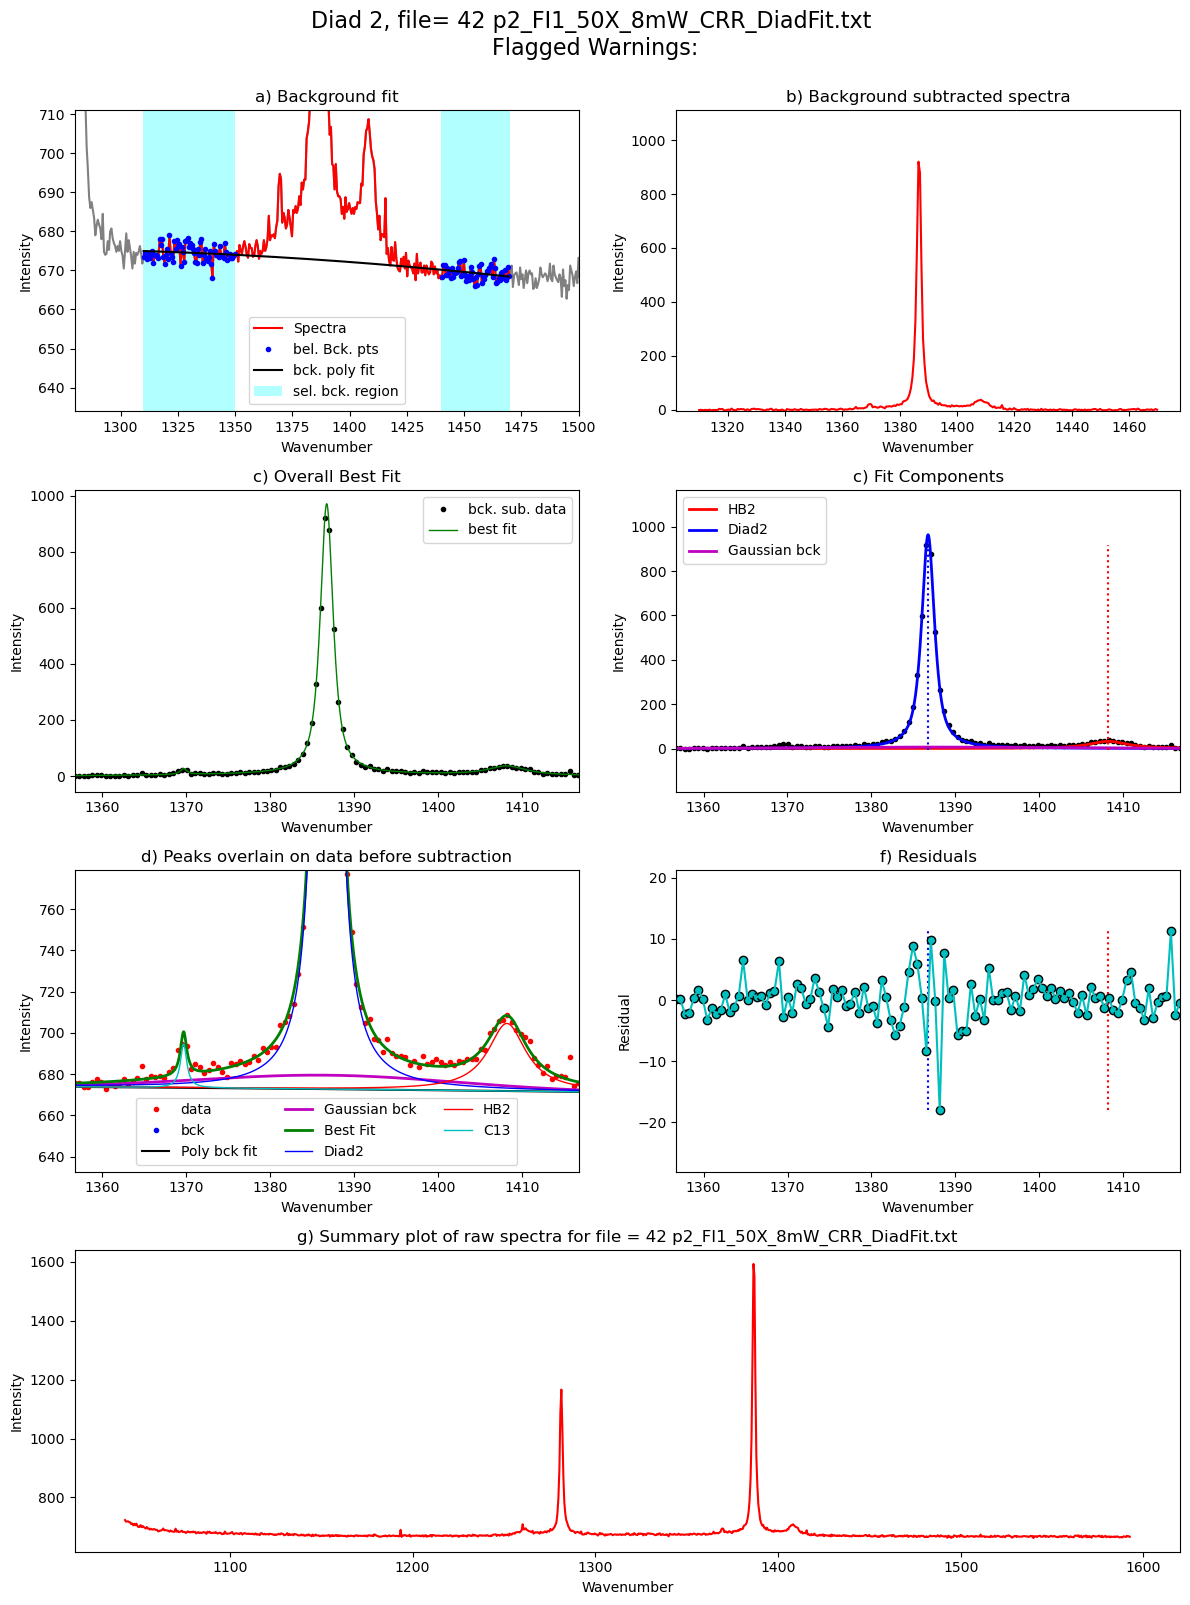

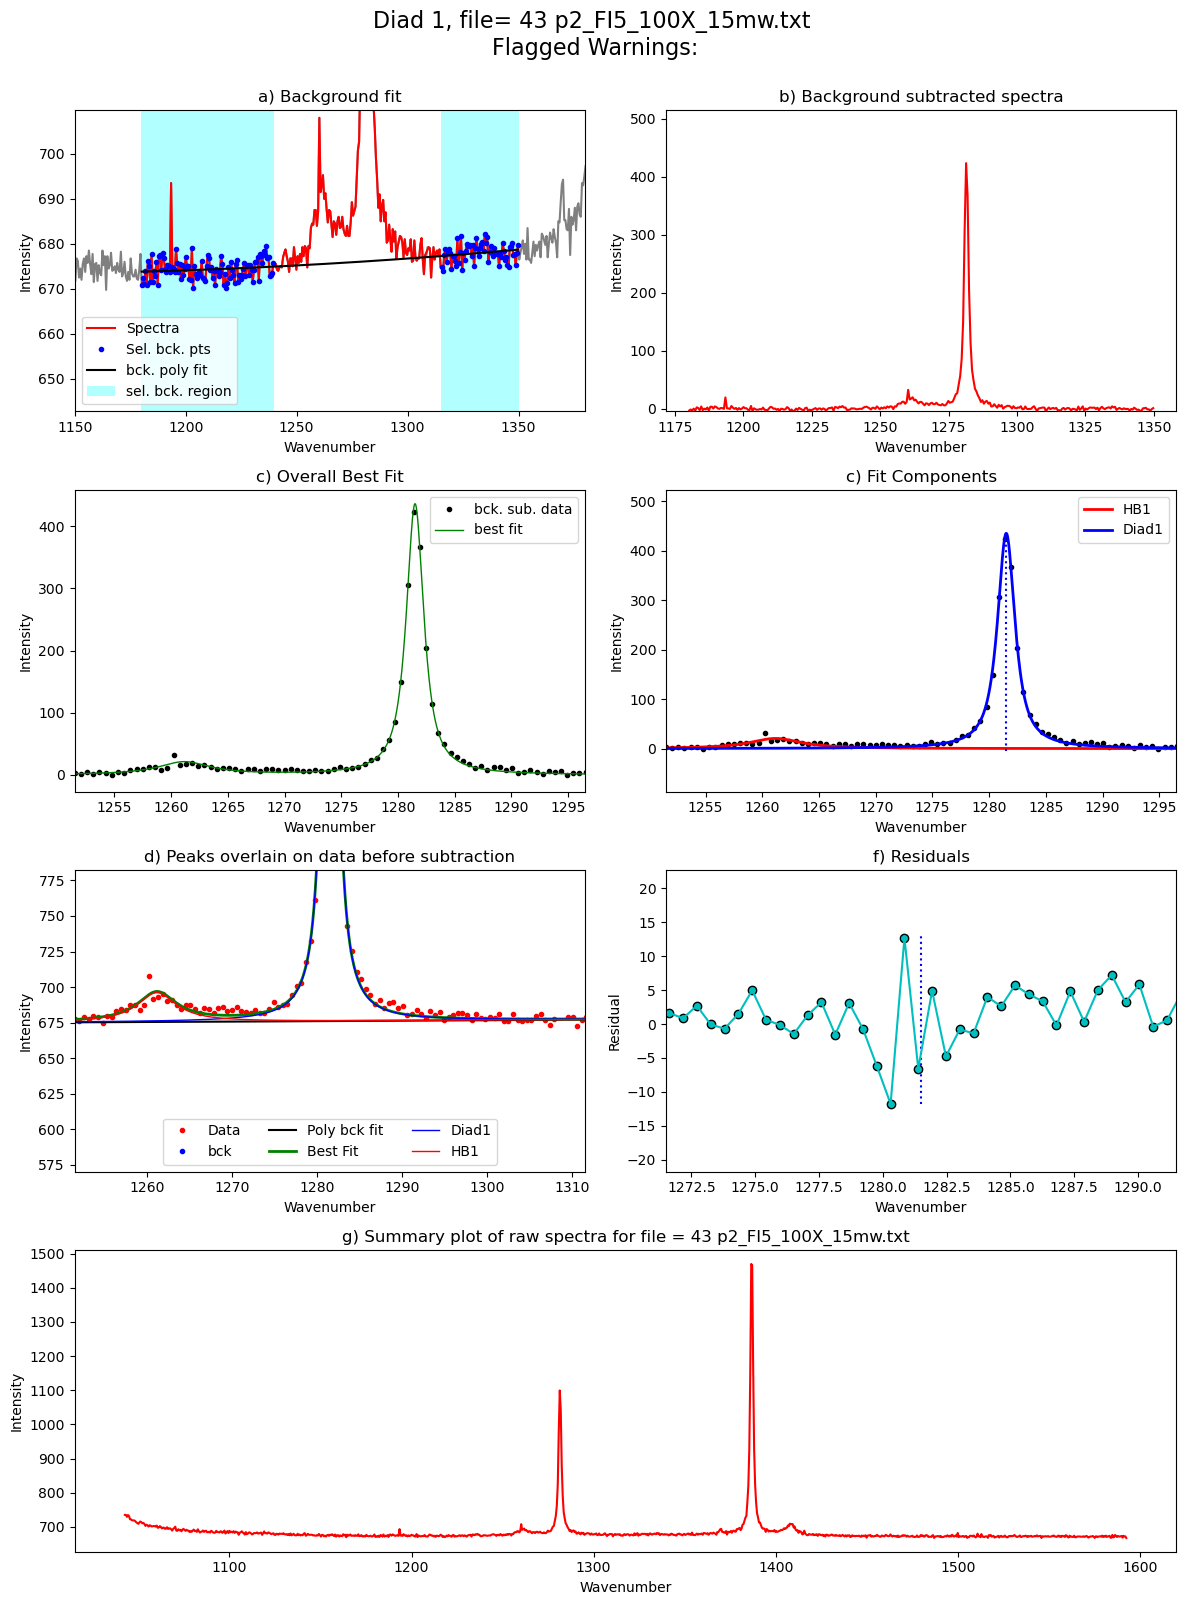

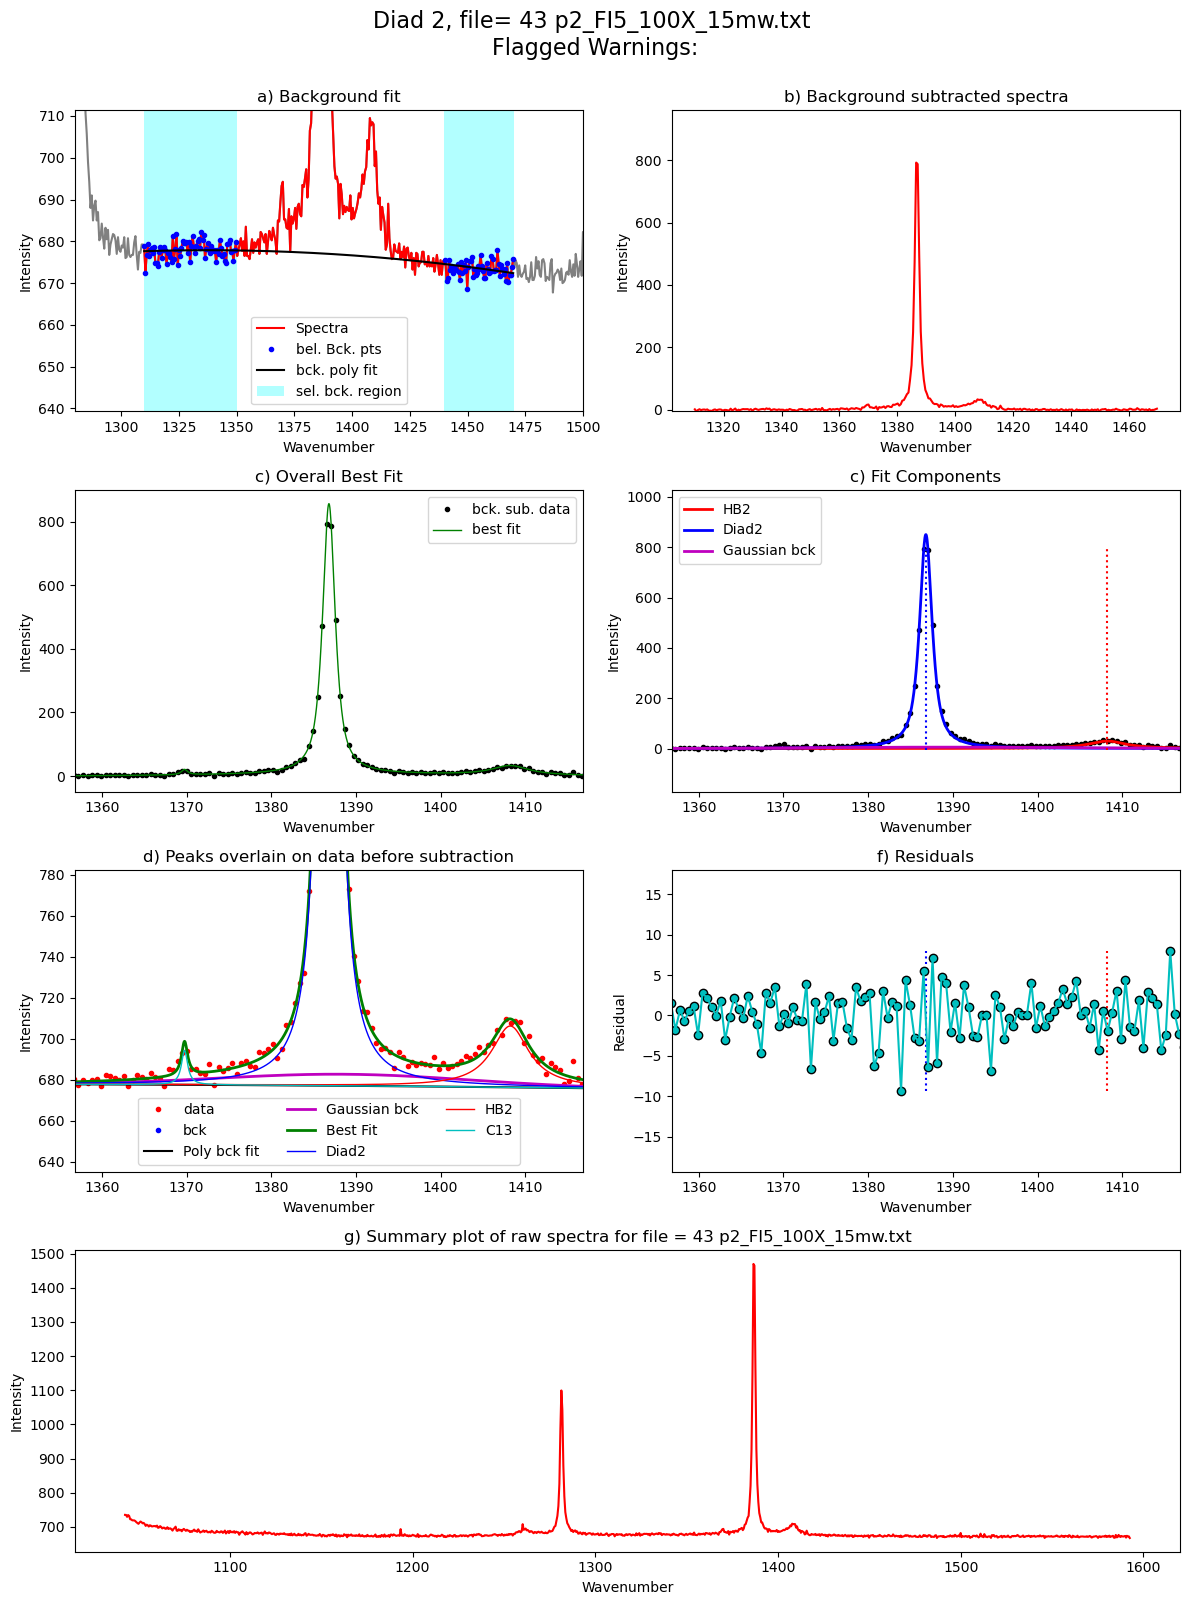

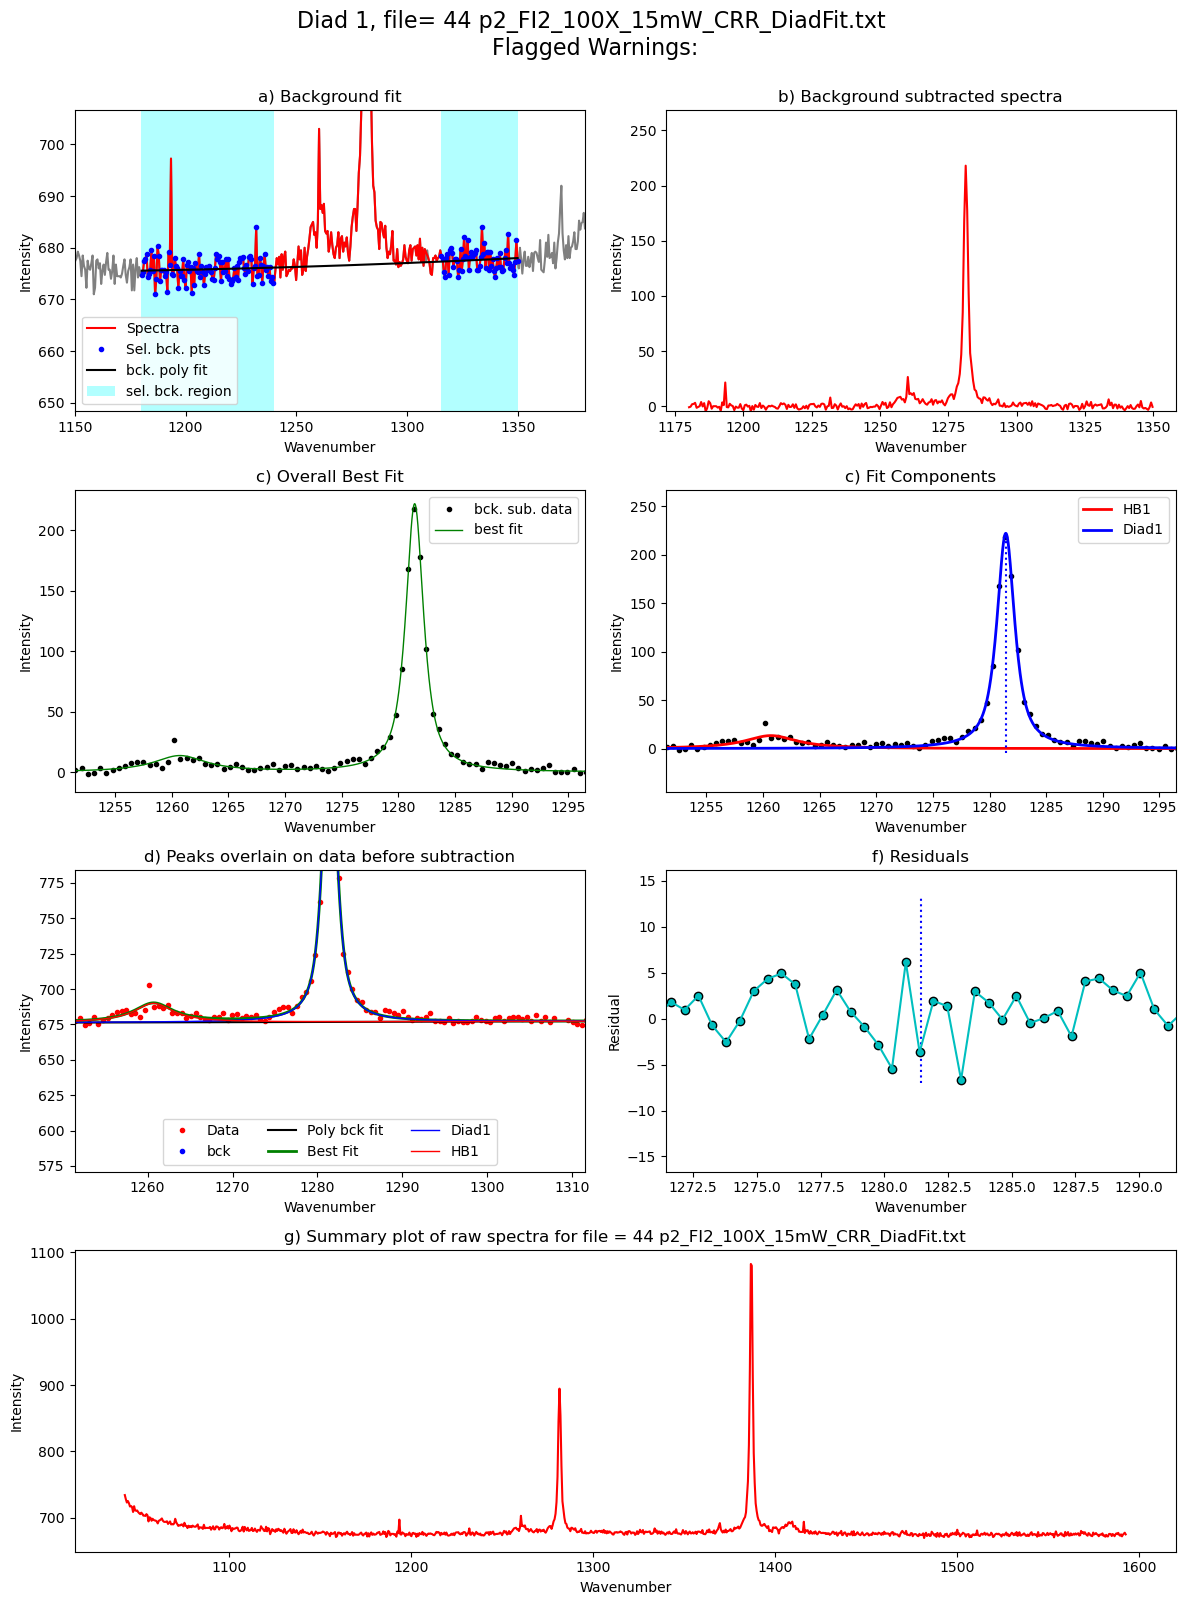

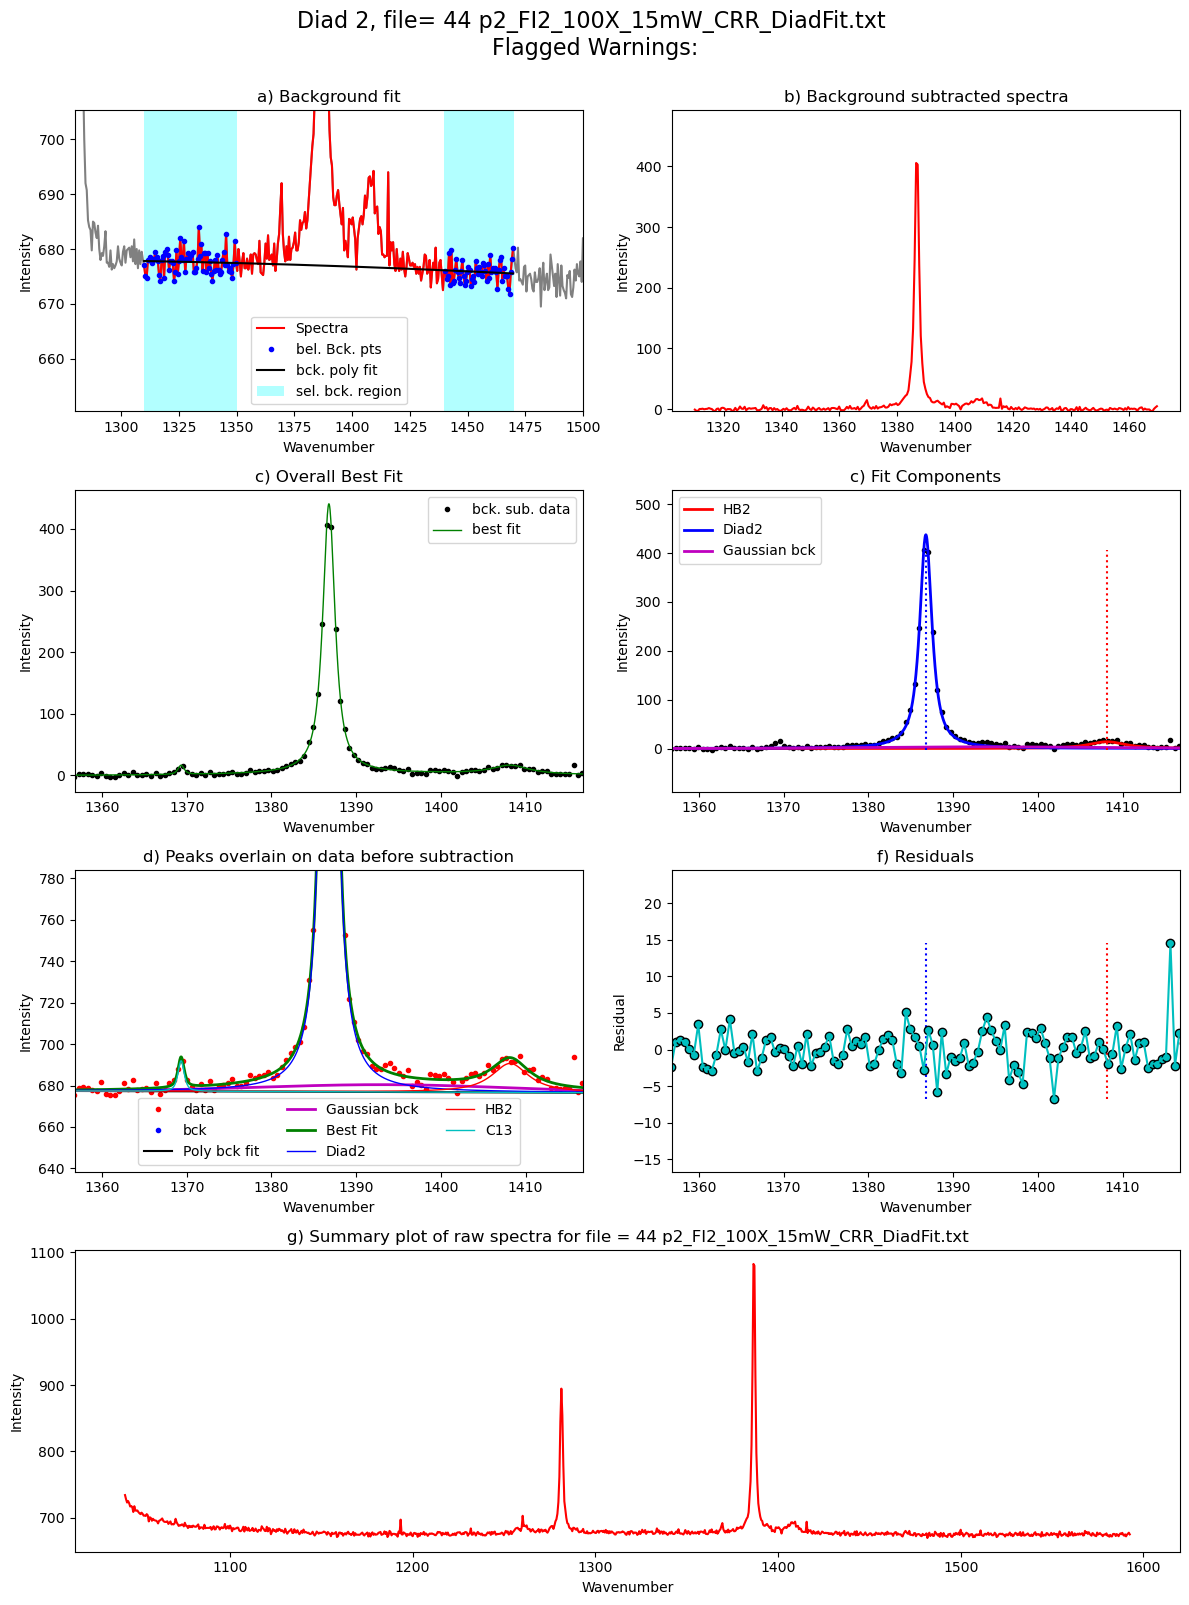

In [12]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [13]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [14]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0            p3_FI4_50x_8mW_down  105.410997  0.007503          1281.253549   
1     p3_FI4_50x_4mW_CRR_DiadFit  105.402445  0.015374          1281.255527   
2                p3_FI2_100x_8mW  105.391879  0.015568          1281.308044   
3               p3_FI2_100x_12mW  105.388660  0.012104          1281.303224   
4               p3_FI3_100x_12mW  105.395257  0.005985          1281.301617   
5               p3_FI1_100x_12mW  104.663374  0.003759          1282.744586   
6                 c1_FI2_50X_8mW  105.384413  0.004037          1281.460496   
7               c1_FI1_100X_12mW  105.373529  0.008935          1281.474109   
8                 c1_FI4_50X_8mW  105.389059  0.009933          1281.445774   
9     p2_FI1_50X_8mW_CRR_DiadFit  105.414311  0.005097          1281.325499   
10              p2_FI5_100X_15mw  105.305293  0.005740          1281.502497   
11  p2_FI2_100X_15mW_CRR_DiadFit  105.349141  0.010201          1281.434939   

    Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0         0.006891             360.187716       1281.253599       1060.811066   
1         0.014099             126.104082       1281.255577        359.734932   
2         0.014228             138.142011       1281.308094        378.380216   
3         0.011324             199.121232       1281.303274        564.841731   
4         0.005602             660.338710       1281.301667       1927.823298   
5         0.003491             816.474766       1282.744636       2234.891520   
6         0.003939            2211.766182       1281.460546       6439.279935   
7         0.008084             320.728604       1281.474159        925.680002   
8         0.009911            3191.025185       1281.445824       9207.742352   
9         0.004637             502.233230       1281.325549       1430.227269   
10        0.005333             435.968111       1281.502547       1231.351797   
11        0.009508             222.166458       1281.434989        627.894155   

    Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0            0.981475        2.706836  ...      1.083929      1.116603   
1            0.921745        1.737262  ...      1.047170      1.007463   
2            0.896408        1.914836  ...      1.067308      1.015894   
3            0.938138        2.270415  ...      1.034608      1.011364   
4            0.954793        4.598171  ...      1.063406      1.059119   
5            0.934231        3.494907  ...      1.010753      1.024112   
6            0.937095       12.494256  ...      1.058608      1.070088   
7            0.919629        2.823460  ...      1.146771      1.124839   
8            0.930729       16.731638  ...      1.034672      1.061250   
9            0.945442        2.485111  ...      1.062385      1.041147   
10           0.930239        2.393925  ...      1.009025      1.080834   
11           0.946811        1.952152  ...      1.085766      1.053247   

   Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  \
0                   0.164748              0.005450      1.096774   
1                   0.086957              0.014619      1.175705   
2                   0.120670              0.012978      1.133858   
3                   0.064935              0.009423      1.001873   
4                   0.121079              0.002892      1.020370   
5                   0.020091              0.002288      1.046559   
6                   0.109843              0.000847      1.070746   
7                   0.269950              0.005735      1.003704   
8                   0.064540              0.000583      1.051233   
9                   0.117963              0.003765      1.029412   
10                  0.016791              0.004267      1.067437   
11                  0.162409              0.008523      1.029014   

    Diad2_Asym70  Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF  \
0       1.021465         

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [15]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()

ModuleNotFoundError: No module named 'winotify'